In [1]:
import pandas as pd
import numpy as np
np.random.seed(1)
from matplotlib import pyplot as plt
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

from multiprocessing import cpu_count, Pool

In [9]:
tr = pd.read_pickle('../data/train.pkl')
tr_log = pd.read_pickle('../data/train_log.pkl')

y_true = pd.read_pickle('../data/y_true.pkl').values
y_pred = pd.read_pickle('../data/oof.pkl')


In [10]:
idx_gal = tr[tr['hostgal_photoz'] == 0].index
idx_exgal = tr[tr['hostgal_photoz'] != 0].index


y_pred.iloc[idx_gal, [1, 3, 4, 6, 7, 9, 10, 11, 13]] = 0
y_pred.iloc[idx_exgal, [0, 2, 5, 8, 12]] = 0

y_pred = y_pred.values.astype(float)
y_pred /= y_pred.sum(1)[:,None]

tmp = y_true * y_pred

tr['loss'] = 1 - tmp.max(1)


In [11]:
labelname = [f'class_{i}' for i in [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]]
tmp = pd.DataFrame(y_pred, columns=labelname)
tr = pd.concat([tr, tmp], axis=1)

In [34]:
tr['pred'] = tr[labelname].idxmax(1).map(lambda x: x.split('_')[1]).astype(int)

In [44]:
tr['tmp'] = tr['target'].astype(str) + ' -> ' + tr['pred'].astype(str)

90 -> 90    2176
65 -> 65     973
16 -> 16     914
42 -> 42     779
88 -> 88     358
15 -> 15     339
42 -> 90     301
92 -> 92     233
62 -> 62     219
62 -> 42     138
6 -> 6       132
67 -> 90     127
52 -> 90     123
95 -> 95     121
62 -> 90     105
90 -> 42     102
15 -> 90      85
64 -> 64      67
15 -> 42      62
42 -> 62      55
52 -> 42      46
42 -> 15      43
67 -> 67      39
95 -> 42      29
53 -> 53      28
67 -> 42      22
90 -> 15      17
67 -> 62      17
95 -> 90      16
6 -> 65       15
            ... 
42 -> 64       7
64 -> 62       7
95 -> 15       6
52 -> 52       6
92 -> 16       6
62 -> 15       5
52 -> 62       5
62 -> 67       5
42 -> 67       5
6 -> 16        4
90 -> 67       3
42 -> 95       3
52 -> 67       3
88 -> 42       2
88 -> 15       2
95 -> 88       2
67 -> 64       2
65 -> 6        1
15 -> 67       1
64 -> 15       1
67 -> 15       1
90 -> 64       1
53 -> 92       1
53 -> 65       1
95 -> 62       1
15 -> 64       1
90 -> 95       1
64 -> 95      

In [41]:
tr.sort_values('loss', ascending=False, inplace=True)
tr.reset_index(drop=True, inplace=True)
tr

object_id          ra       decl       gal_l      gal_b  ddf  \
0      46553925  154.160156  -1.193748  243.846629  43.230097    0   
1        106937   53.085938 -28.122234  224.100909 -54.509752    1   
2      41172946   93.713593 -51.642994  259.753300 -26.445726    0   
3     106095299  295.563385 -50.285809  348.059675 -28.412645    0   
4     117612439  299.707031 -14.169522   27.409053 -21.205571    0   
5      75829070  336.838226 -52.029728  340.246944 -53.353919    0   
6     120846104   49.746094 -13.861950  199.343395 -53.163454    0   
7     108055321   82.560486 -43.406857  249.020251 -32.523658    0   
8      51220364  168.574219  -1.492246  259.787323  53.042581    0   
9      83799073  180.000000 -28.122234  289.335411  33.387809    0   
10     76661668  334.335938 -10.351558   50.247225 -50.075066    0   
11     34413965  301.992188  -5.529265   36.764897 -19.528688    0   
12     26385586  352.265625 -31.213543   15.204824 -71.589696    0   
13     82448178   73.652344 -18.839405  218.243722 -33.935892    0   
14     12705010  101.601562 -20.582914  230.899264 -10.288079    0   
15     61407883  338.378906  -7.782714   57.115811 -52.057059    0   
16     31419827  185.976562   2.537361  286.760293  64.541187    0   
17     44537206   88.593750 -36.609226  242.454151 -26.613701    0   
18       223581  349.615387 -63.636005  318.927246 -50.506542    1   
19    120482980  332.443817 -57.018551  335.264469 -48.708779    0   
20     84403546  146.777344   1.193748  235.388769  38.805967    0   
21    130698059  142.734375 -18.997131  250.892051  23.021357    0   
22     64422565  314.824219   0.596842   49.392676 -27.799691    0   
23     33652637  236.953125 -31.563116  341.449743  17.815565    0   
24      6103756   37.617188 -22.185358  205.969557 -67.004488    0   
25     60072280   46.054688  -4.630479  183.453191 -51.181113    0   
26    107760699   60.197369 -47.357574  254.728420 -48.072137    0   
27     26109323    6.503906 -28.630989   16.484194 -84.185489    0   
28       257906   34.277344  -5.679190  170.314930 -60.410322    1   
29        20567  351.259003 -64.386185  317.344860 -50.255113    1   
...         ...         ...        ...         ...        ...  ...   
7818     165406  351.321442 -64.198746  317.458993 -50.429931    1   
7819      44480   53.964844 -28.630989  225.142950 -53.813613    1   
7820      71438   52.558594 -27.279613  222.538937 -54.845107    1   
7821   33061874   40.078125 -11.567418  186.906840 -60.088564    0   
7822      36362   53.085938 -27.784405  223.525509 -54.460748    1   
7823     113335  358.636353 -46.768478  328.890146 -67.388837    1   
7824   30414766  332.402344 -31.738394   15.516535 -54.664954    0   
7825    4364990  251.894531 -25.613083  355.293341  12.462219    0   
7826     304623  351.734680 -62.884678  318.284128 -51.651217    1   
7827   12830725   41.835938  -1.641510  175.308073 -52.309118    0   
7828   17920072   75.269058 -48.336796  254.608769 -37.927022    0   
7829   91861189  197.226562  -6.729813  310.679638  55.878933    0   
7830   36068390   87.890625 -15.868921  220.899836 -20.230690    0   
7831   48405492  265.982147 -58.919773  333.675156 -14.900268    0   
7832  109694858  212.519531  -4.780192  336.665599  52.862855    0   
7833      53025  358.636353 -46.768478  328.890146 -67.388837    1   
7834  120325550   51.152344 -40.620186  246.129821 -55.798218    0   
7835   44637346  234.529419 -42.010422  333.133036  10.882442    0   
7836     131492  150.820312   3.732834  235.666318  43.572109    1   
7837     172461    0.949367 -45.586655  326.991548 -69.251686    1   
7838  115647298   63.984375 -10.048350  203.560518 -39.018417    0   
7839  120024060  322.382812   1.641510   55.189281 -33.579066    0   
7840  114527919  200.390625  -8.536388  315.546792  53.595897    0   
7841   98504357  252.949219  -4.181528   14.288691  24.164393    0   
7842   18568946  186.679688 -23.480536  295.628685  39.040421    0   
7843   54391376 

In [46]:
def plt_obj(oid=None, save=False, path=None, norm=False, return_df=False):
    if oid is None:
        oid = np.random.choice(tr.object_id)
    df = tr_log[tr_log.object_id==oid]
    if norm:
        df.flux /= df.flux.max()
    target = tr.loc[tr.object_id==oid, 'tmp'].values[0]
    loss = tr.loc[tr.object_id==oid, 'loss'].values[0]
    
    df['date'] = df.mjd.astype(int)
    
    df = pd.pivot_table(df, index=['date'], columns=['passband'], values=['flux'])
    if return_df:
        return df
    
    df.plot(marker="o", legend=True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'oid:{oid}    target:{target}    loss:{loss}')
    if save==True and path is not None:
        plt.savefig(path)
    return

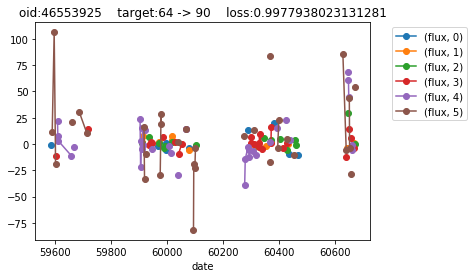

In [47]:
plt_obj(tr.object_id[0])

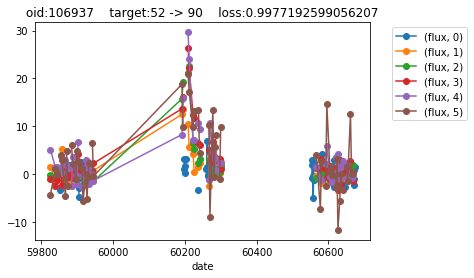

In [48]:
plt_obj(tr.object_id[1])

100%|██████████| 14/14 [03:01<00:00, 12.95s/it]


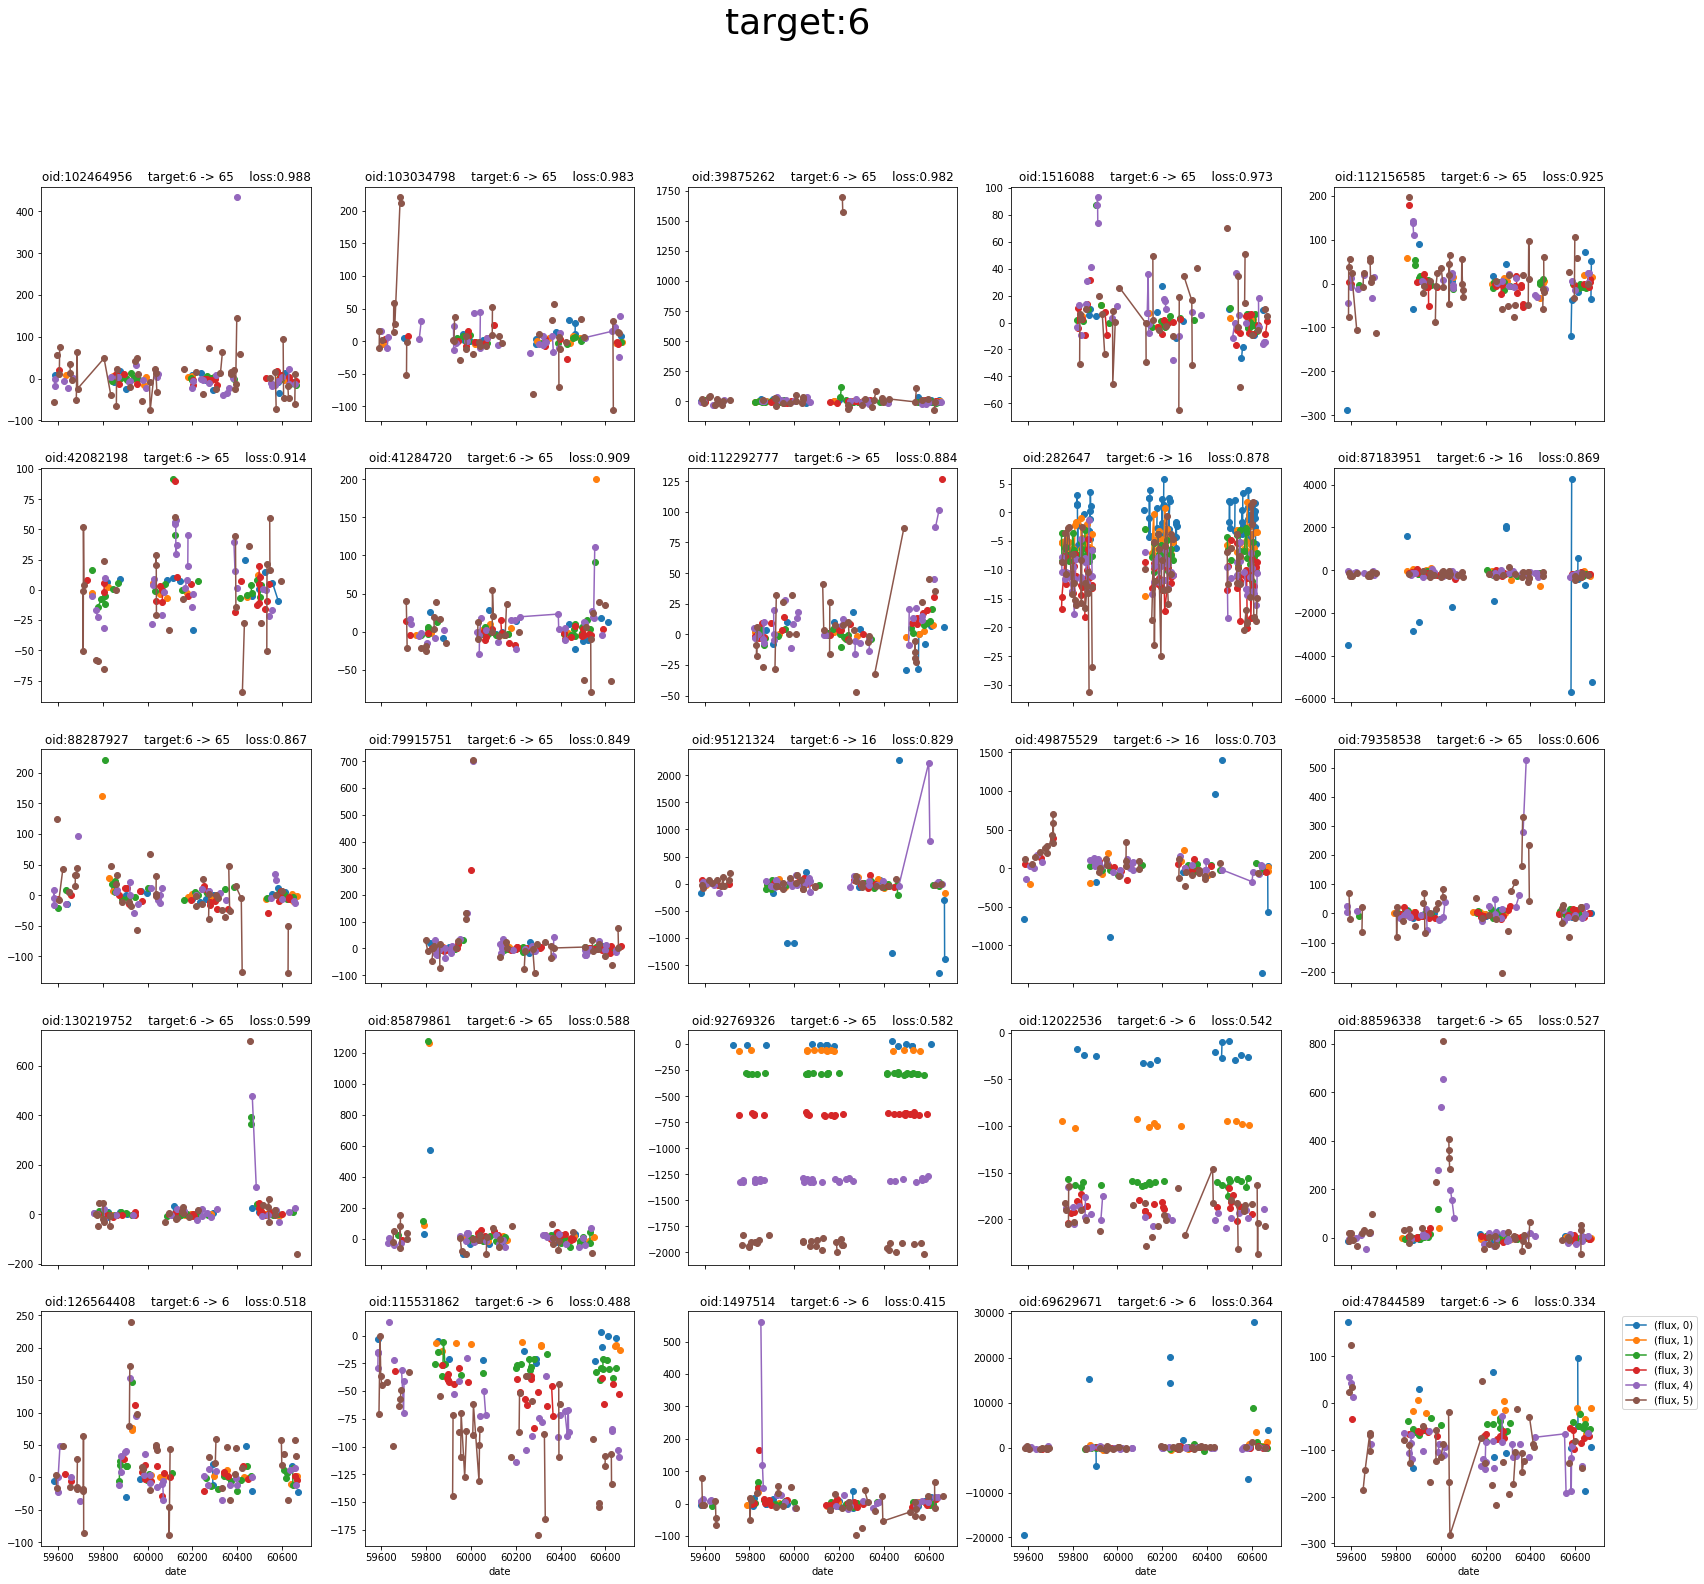

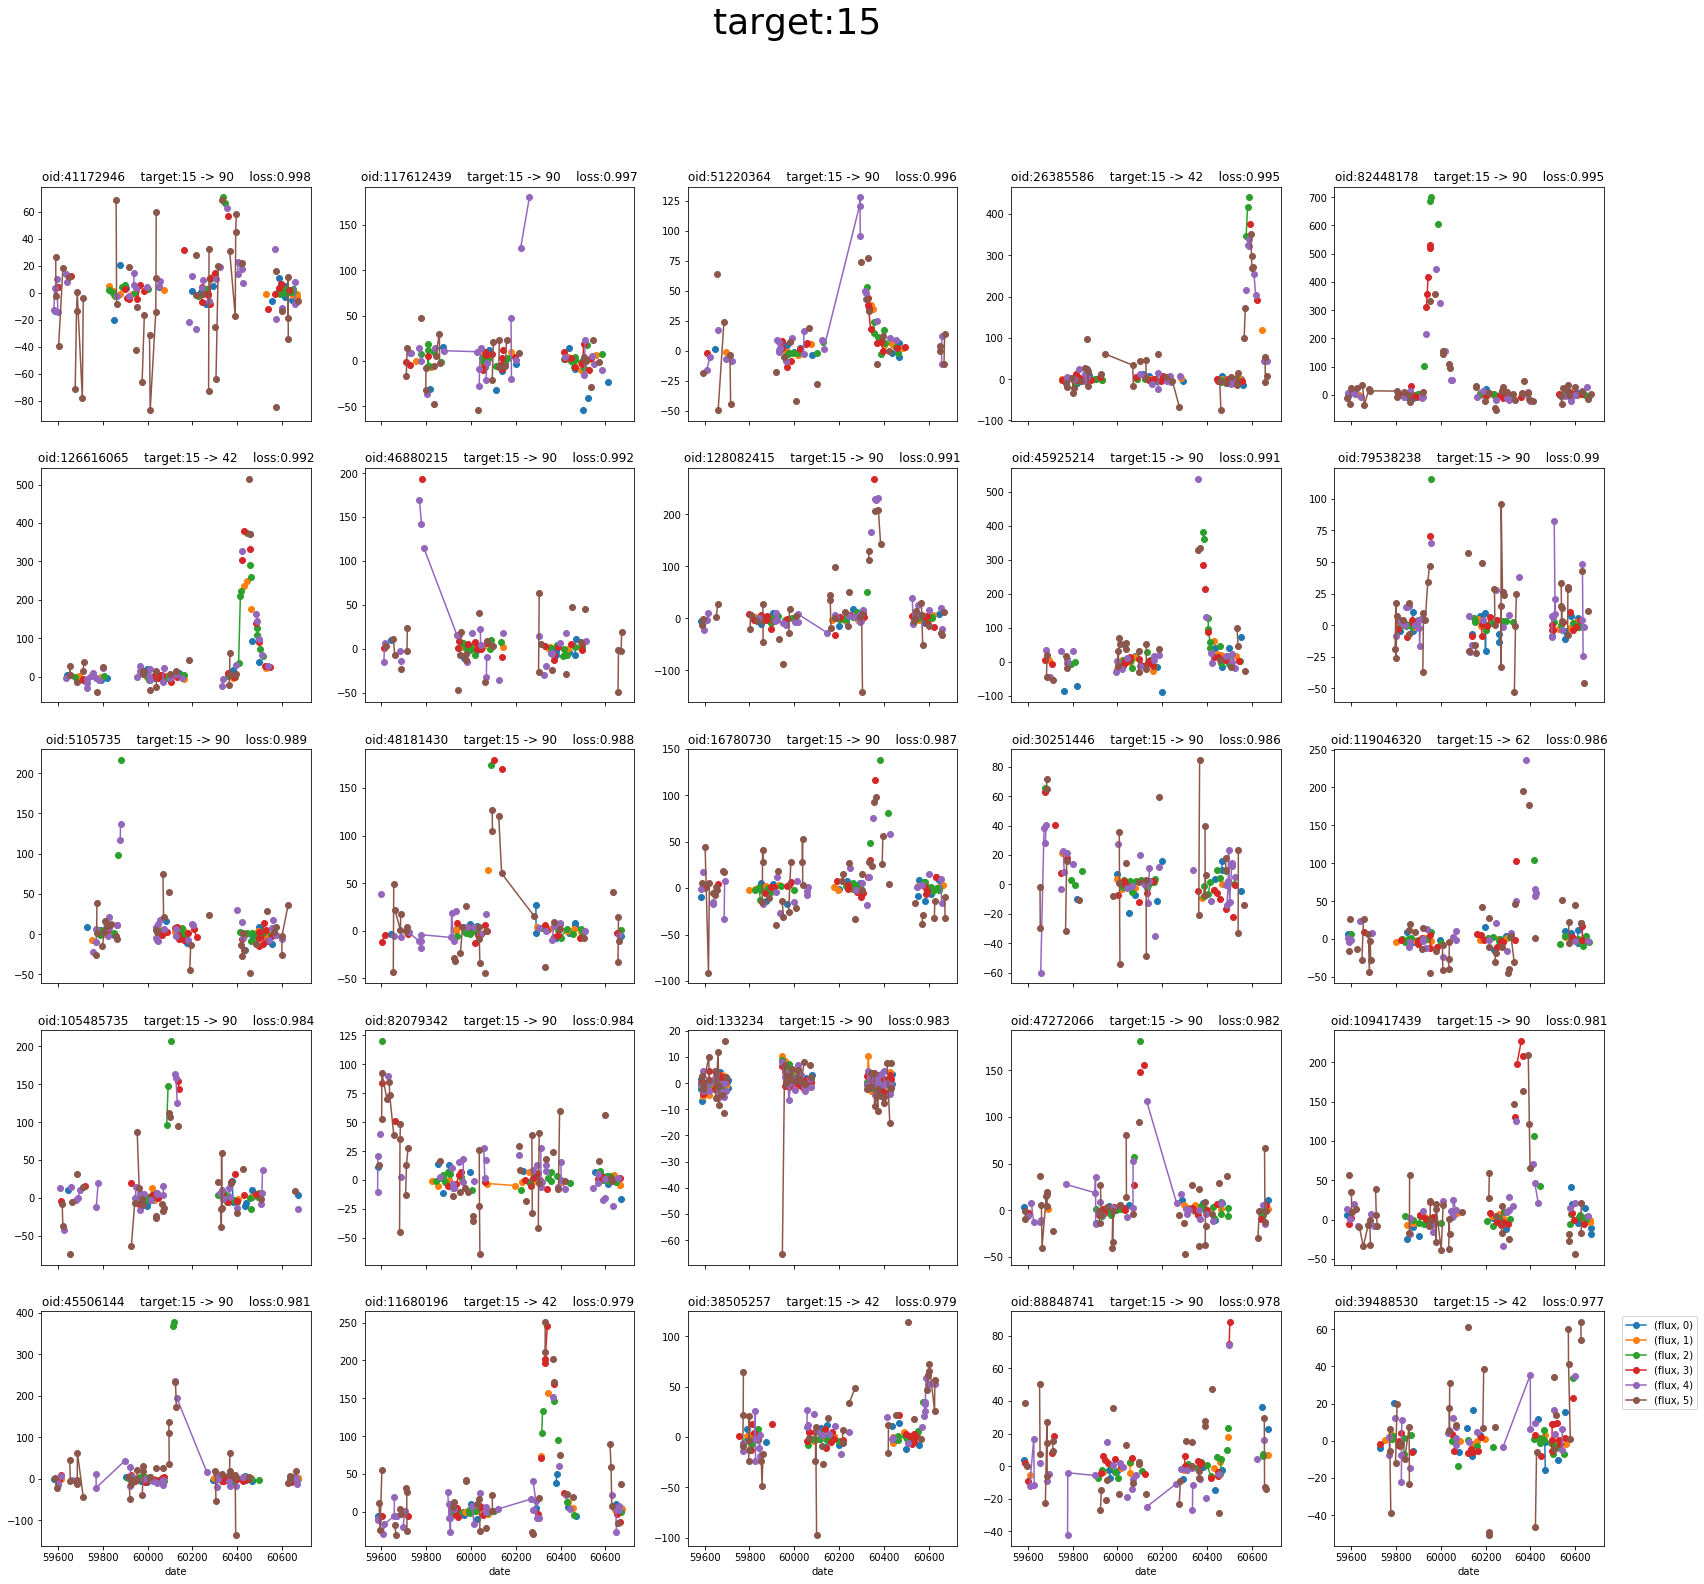

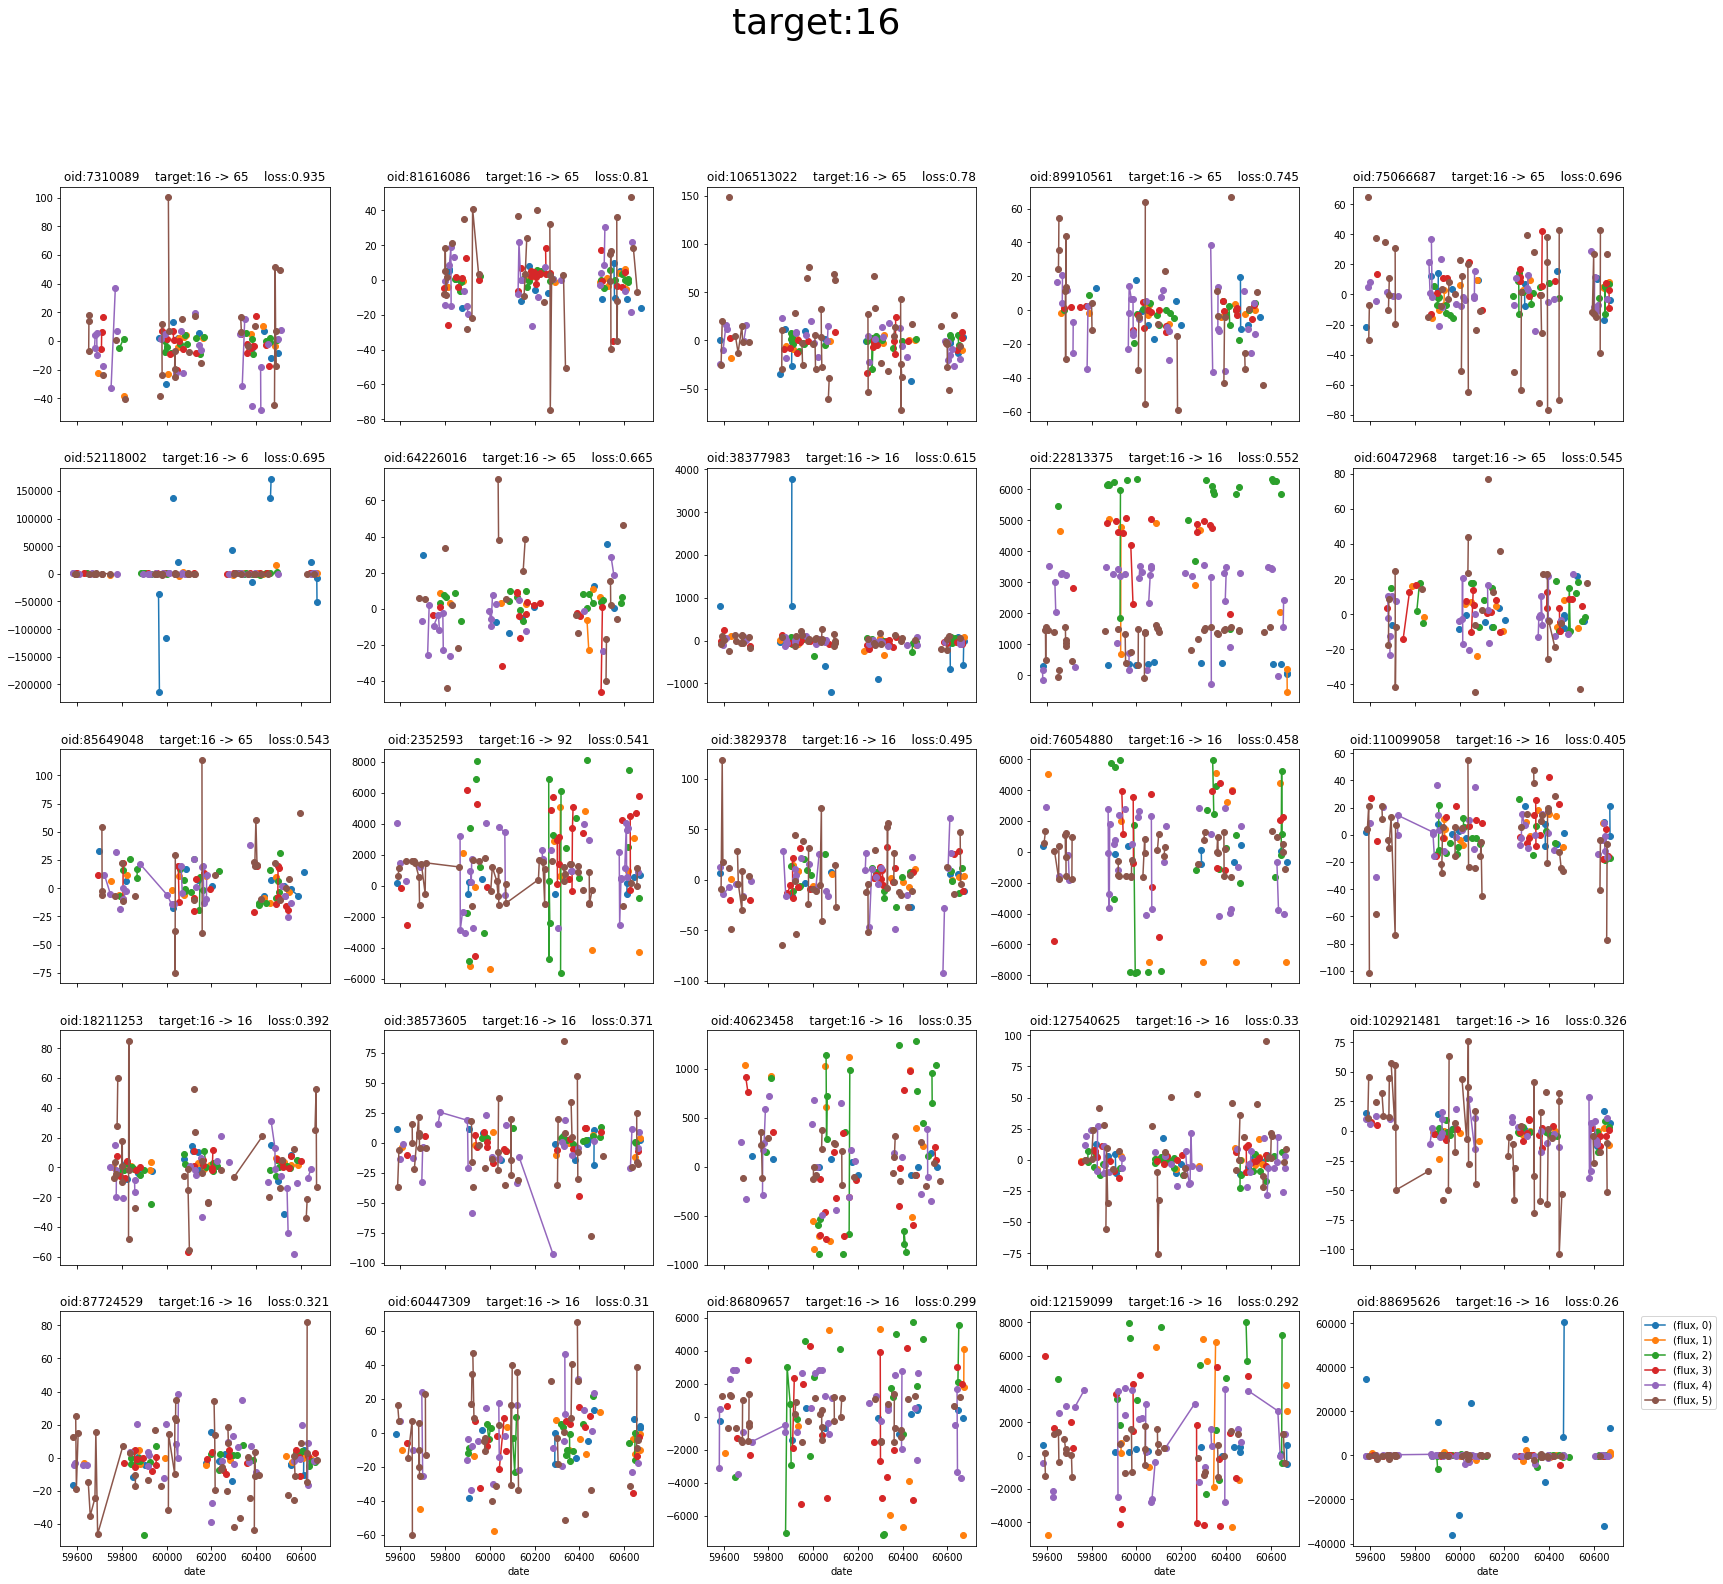

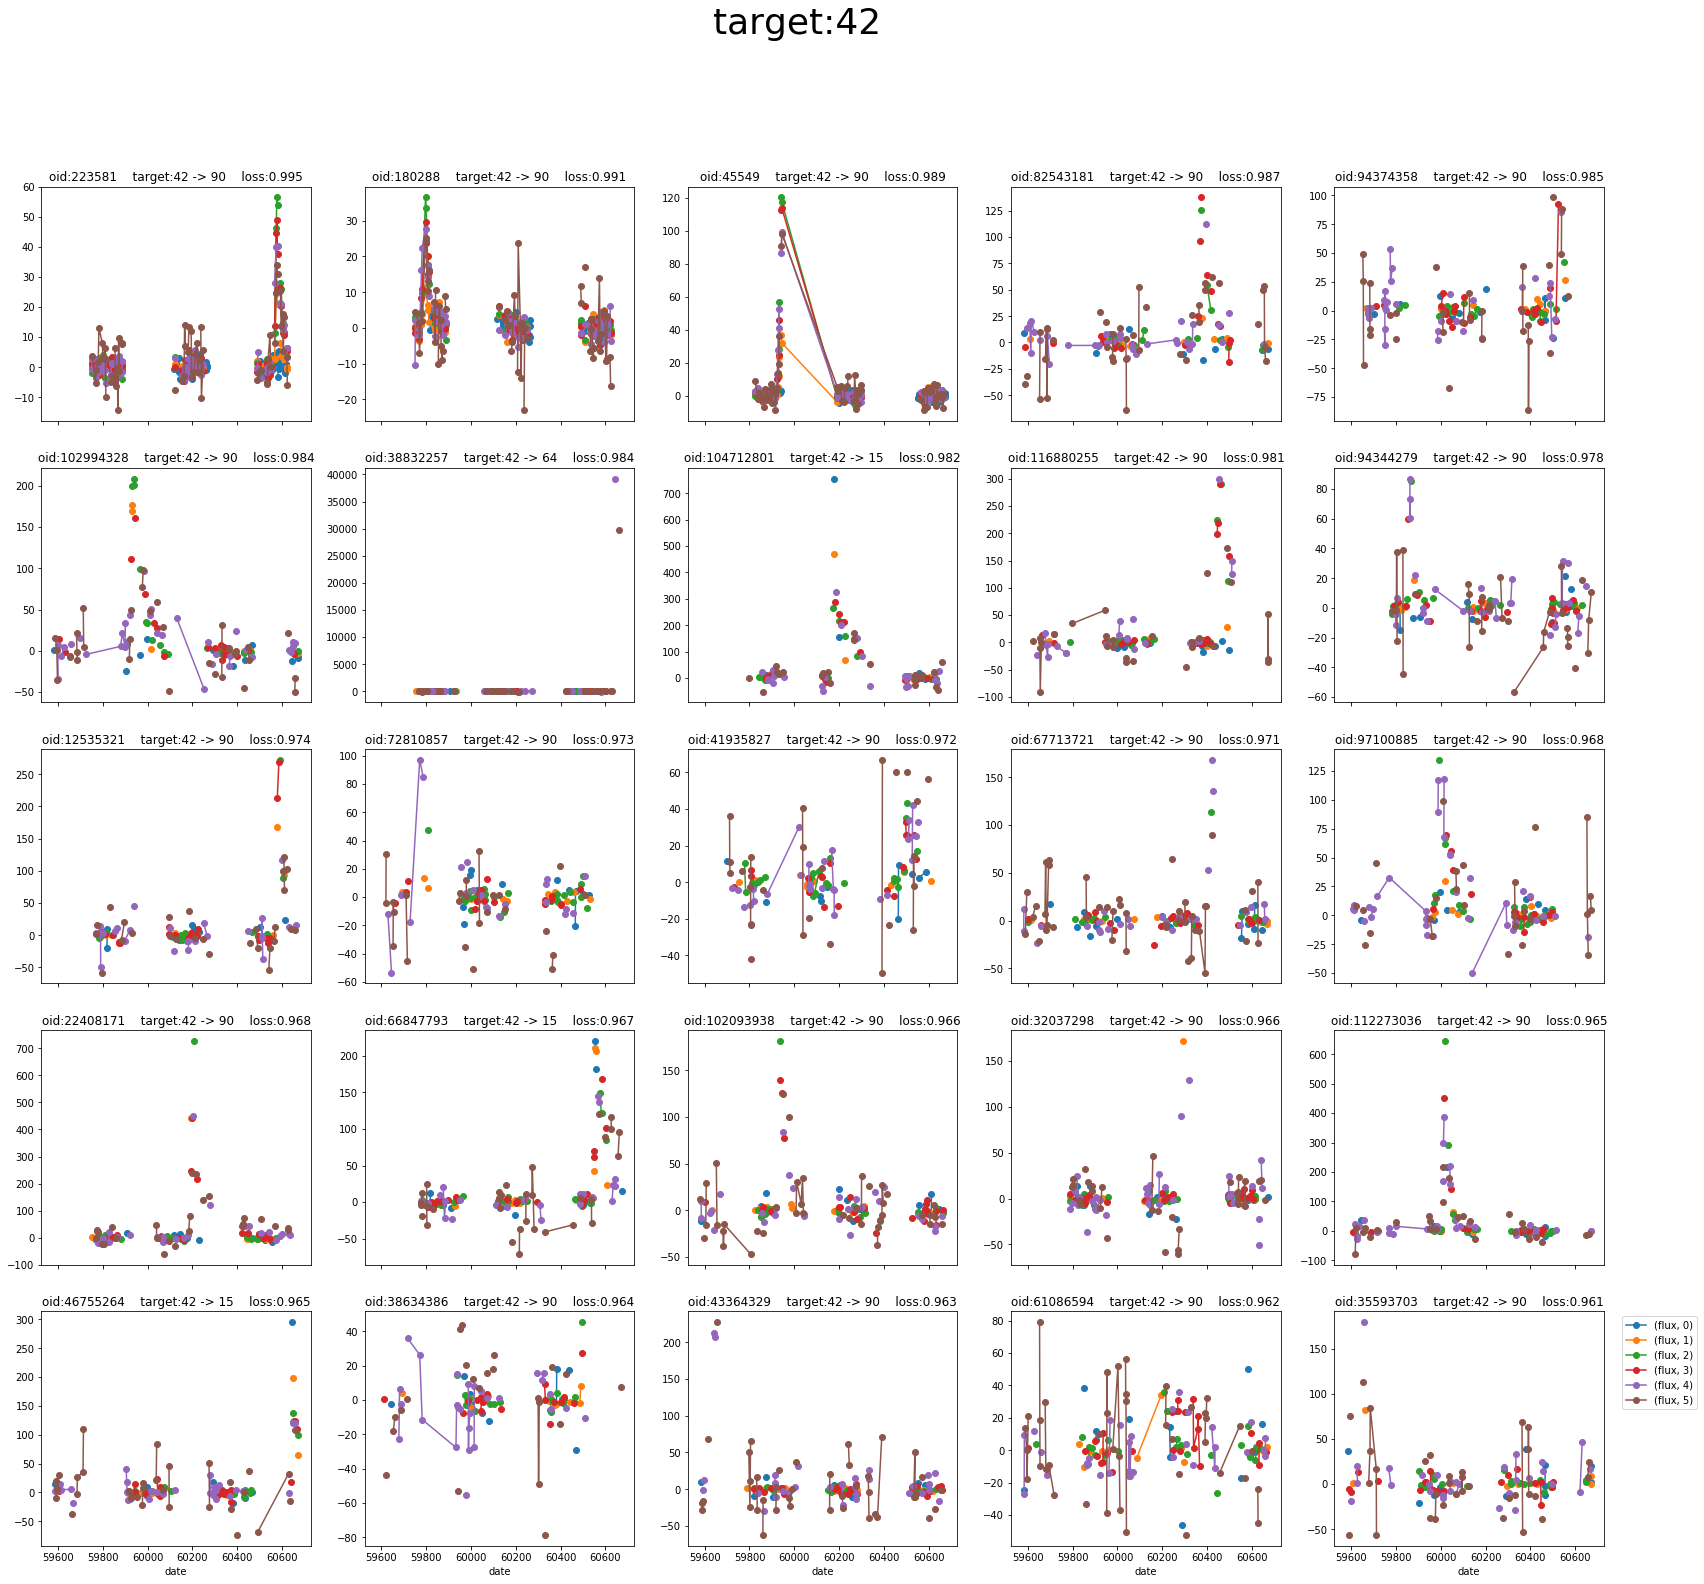

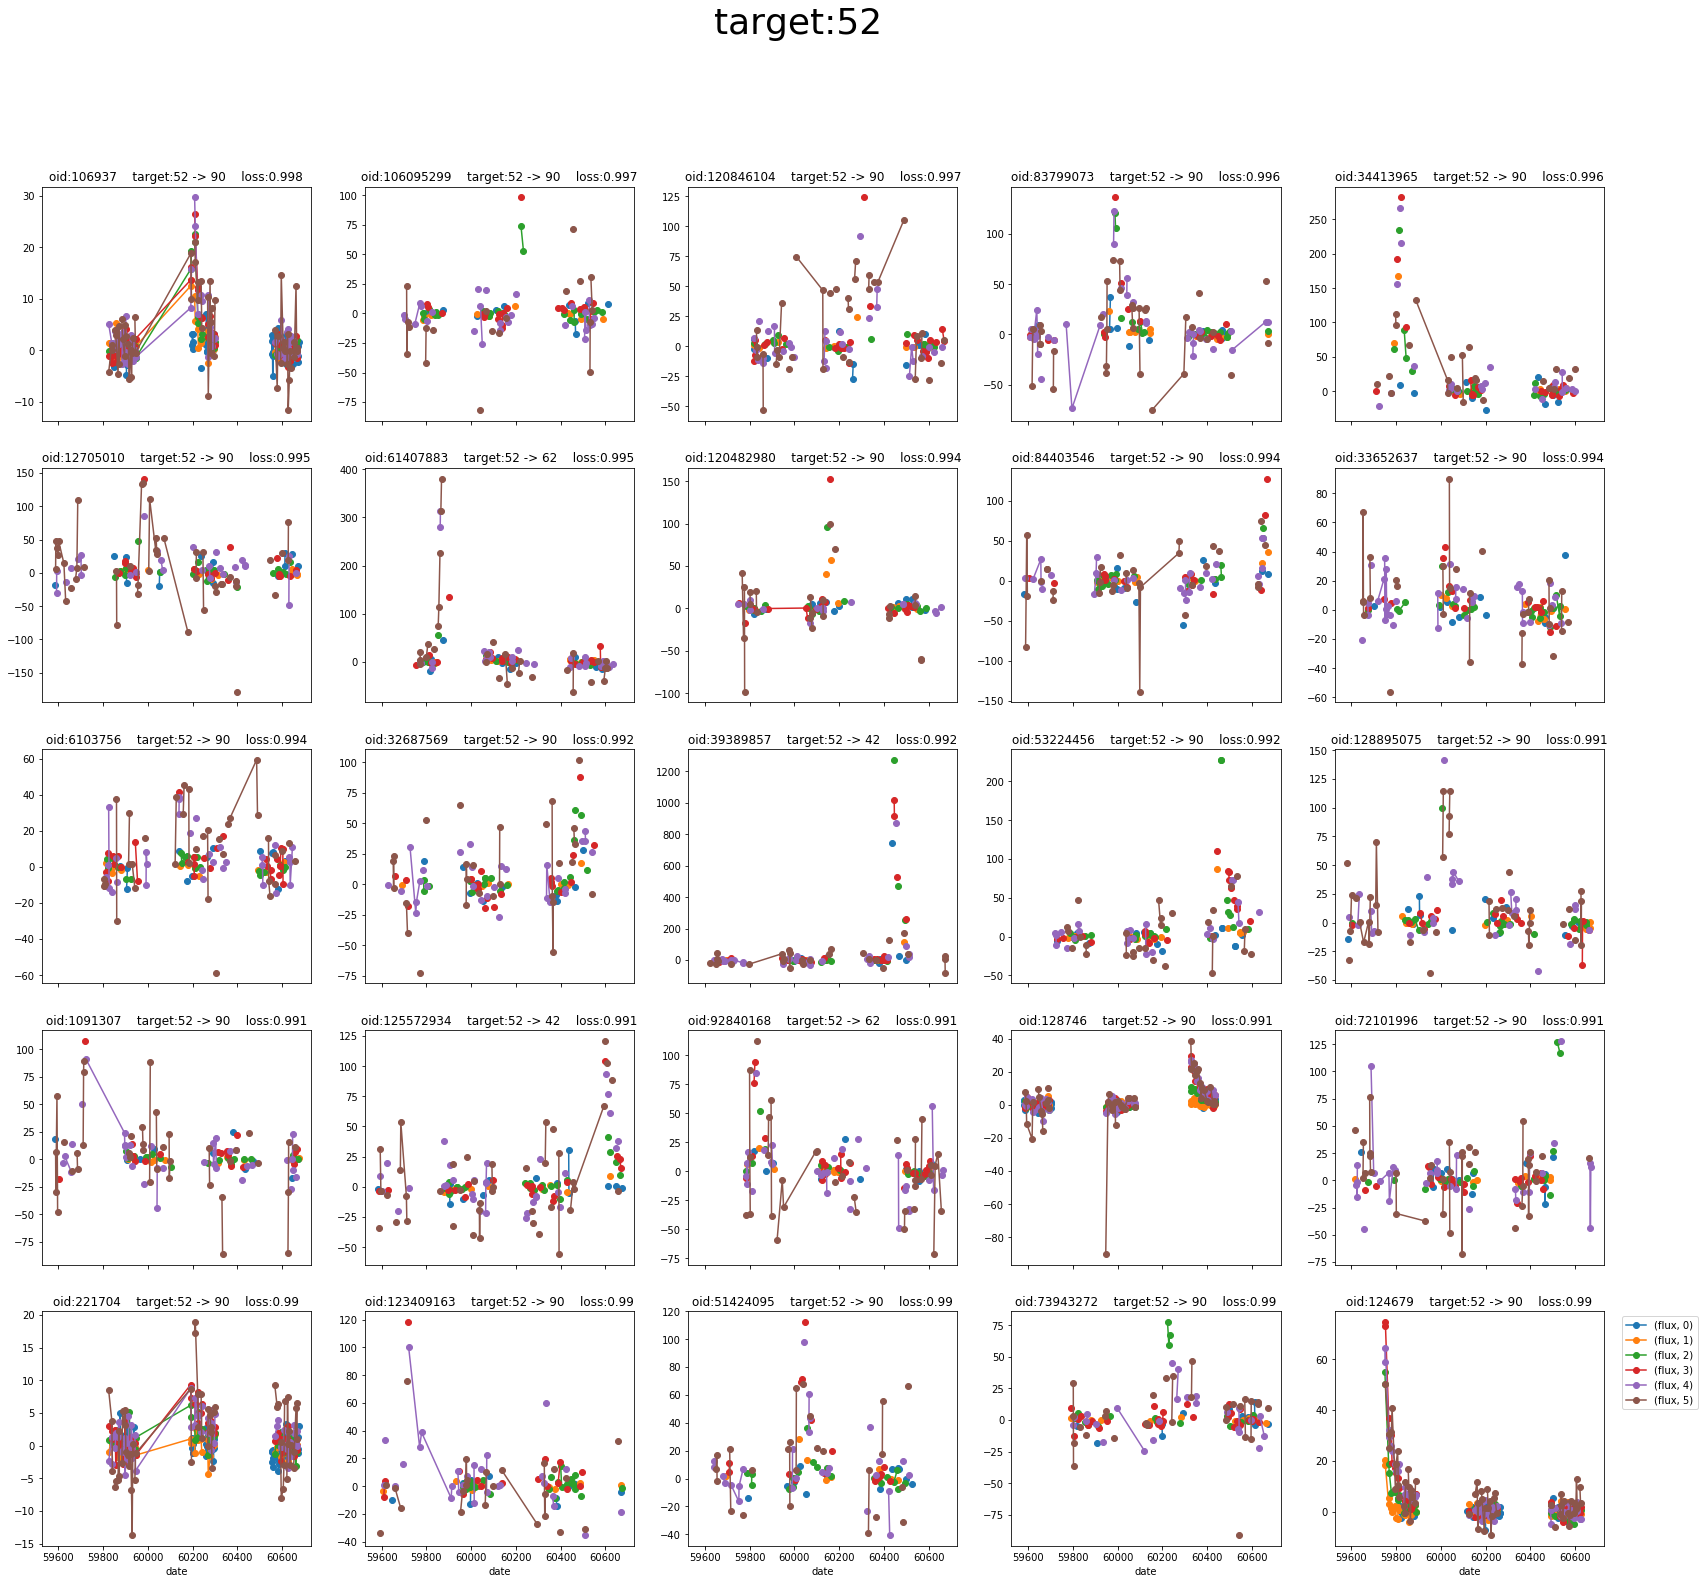

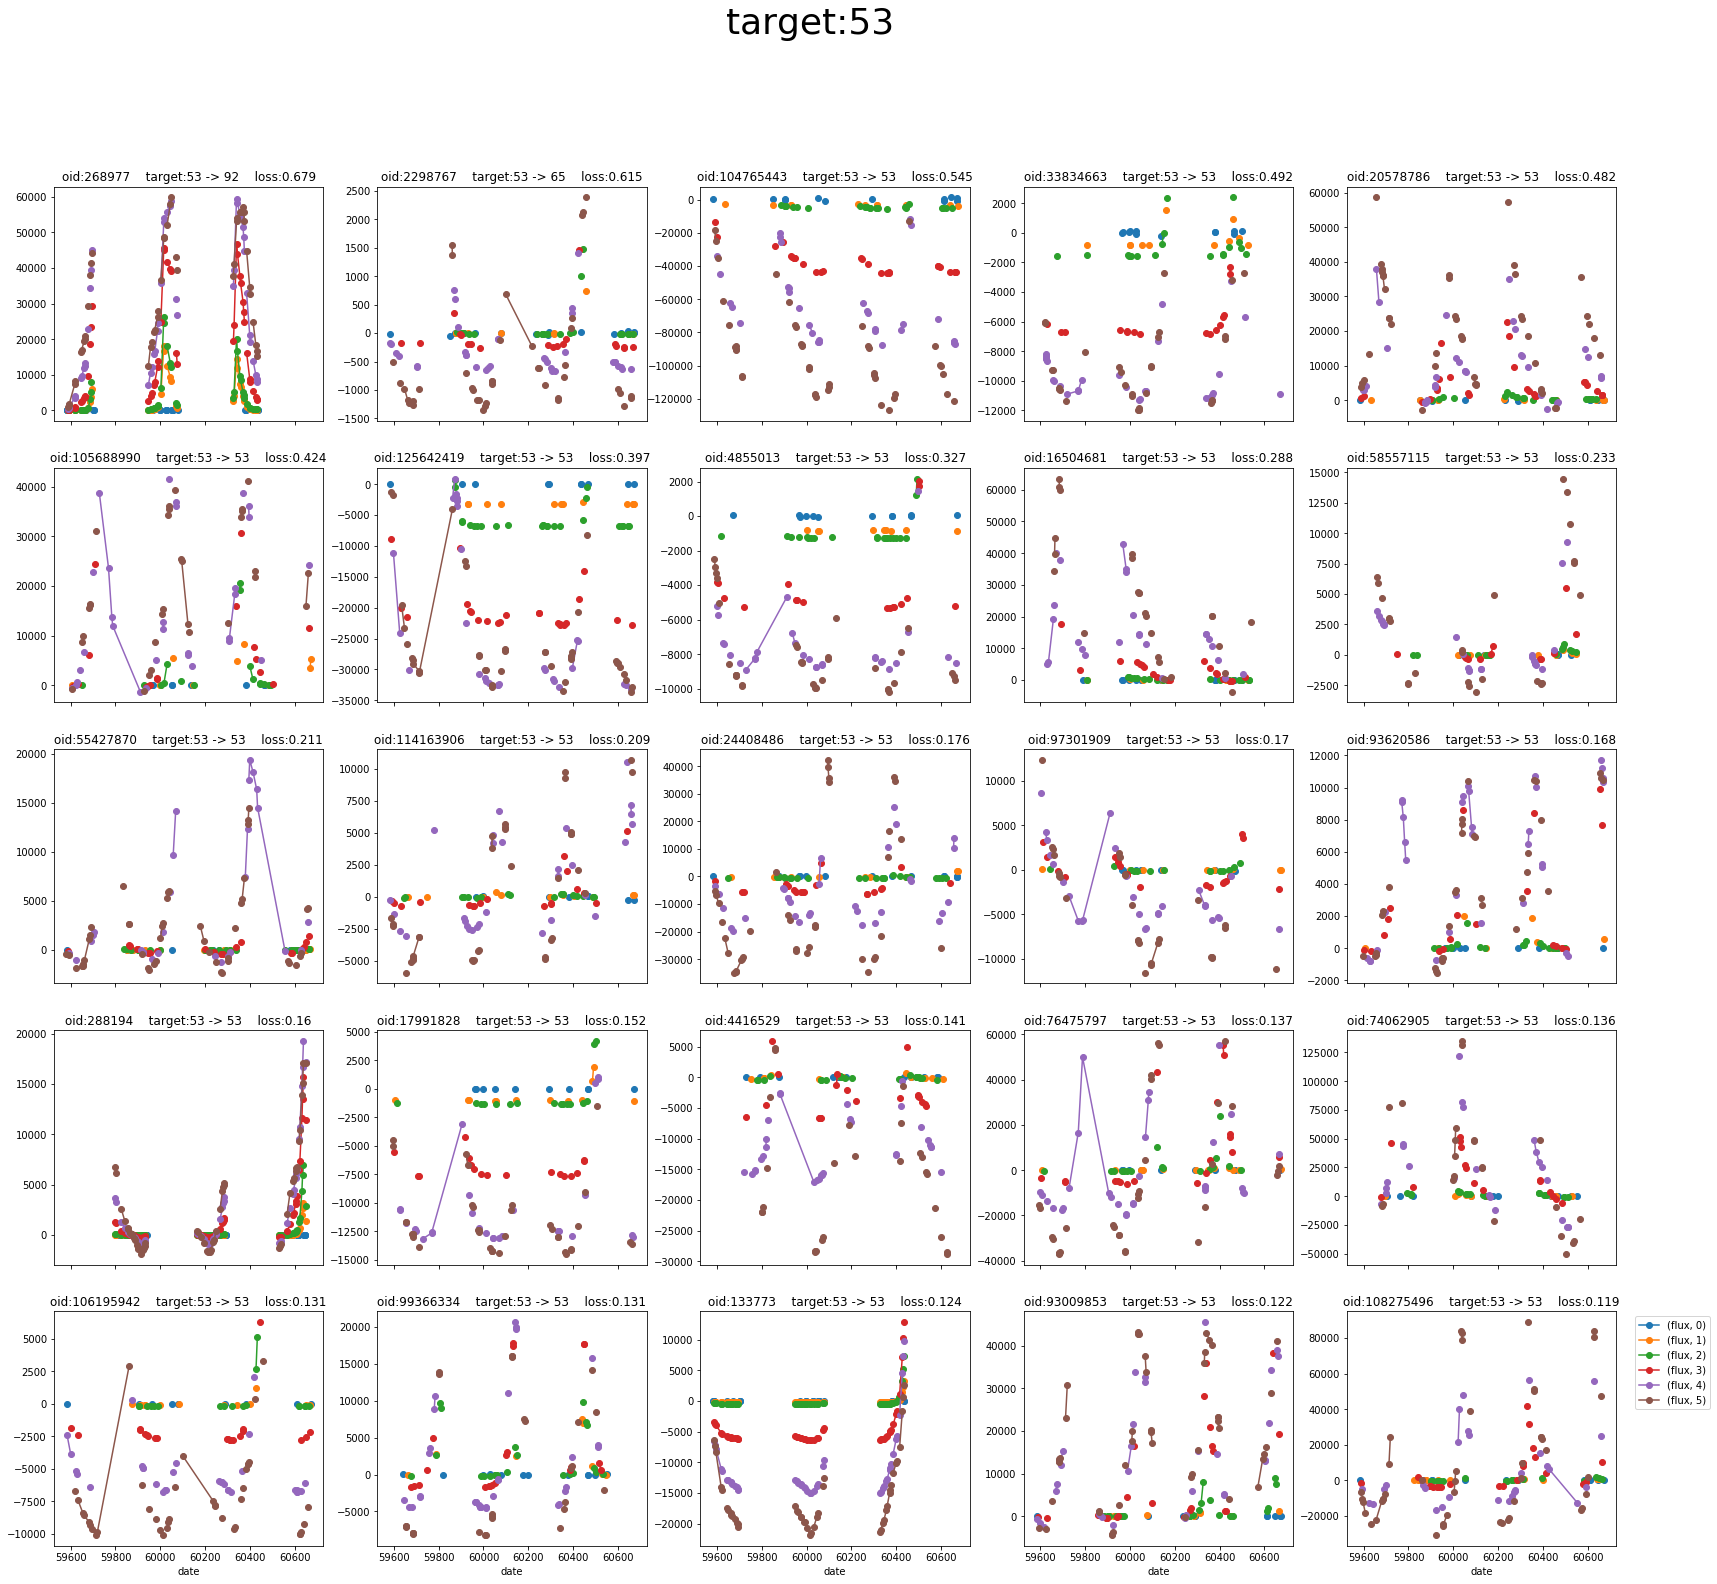

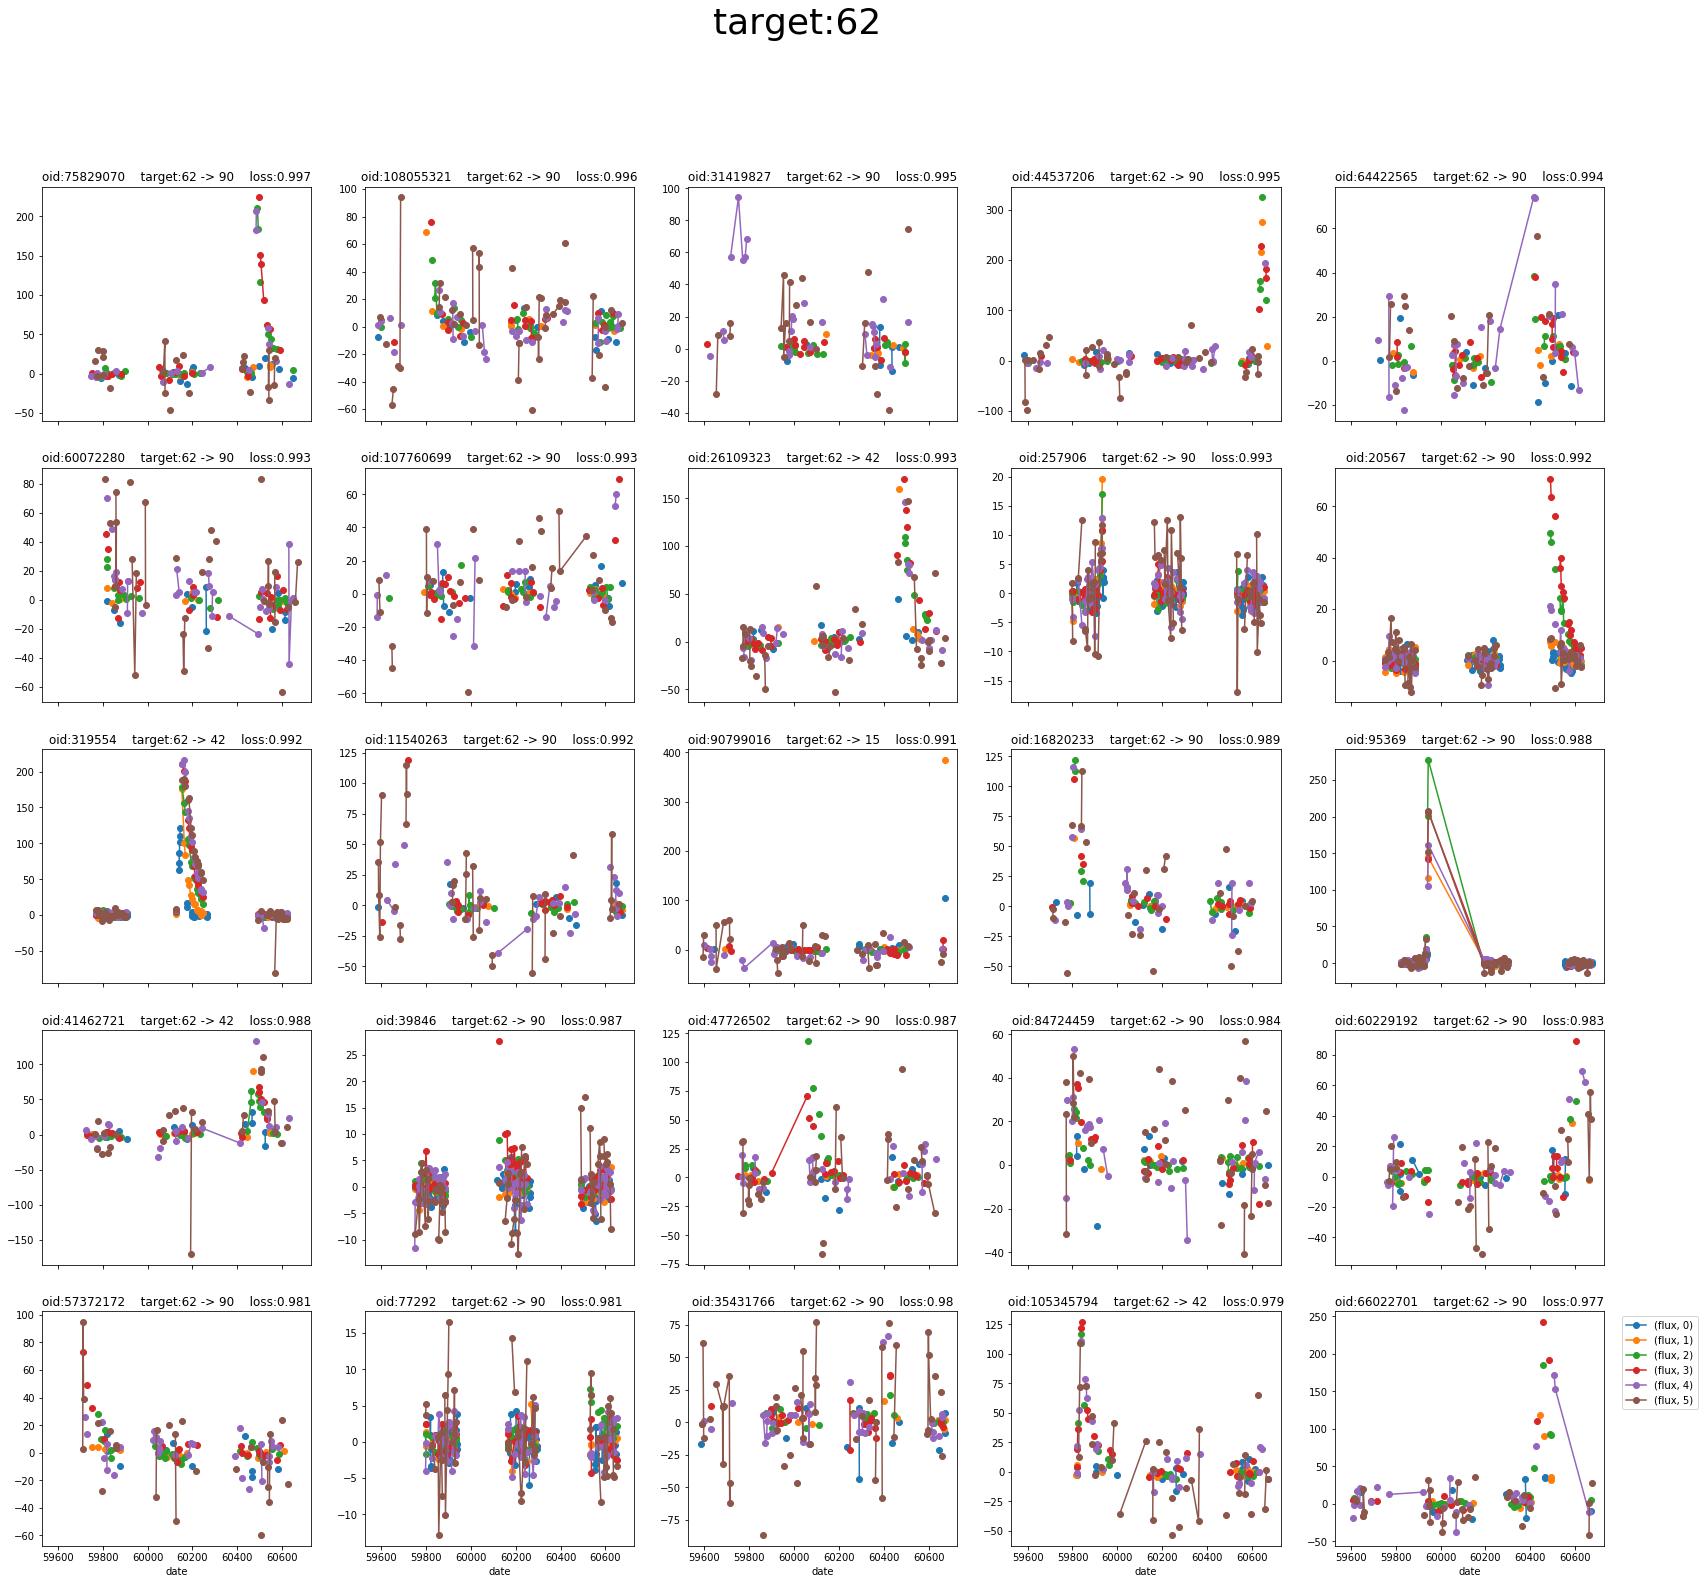

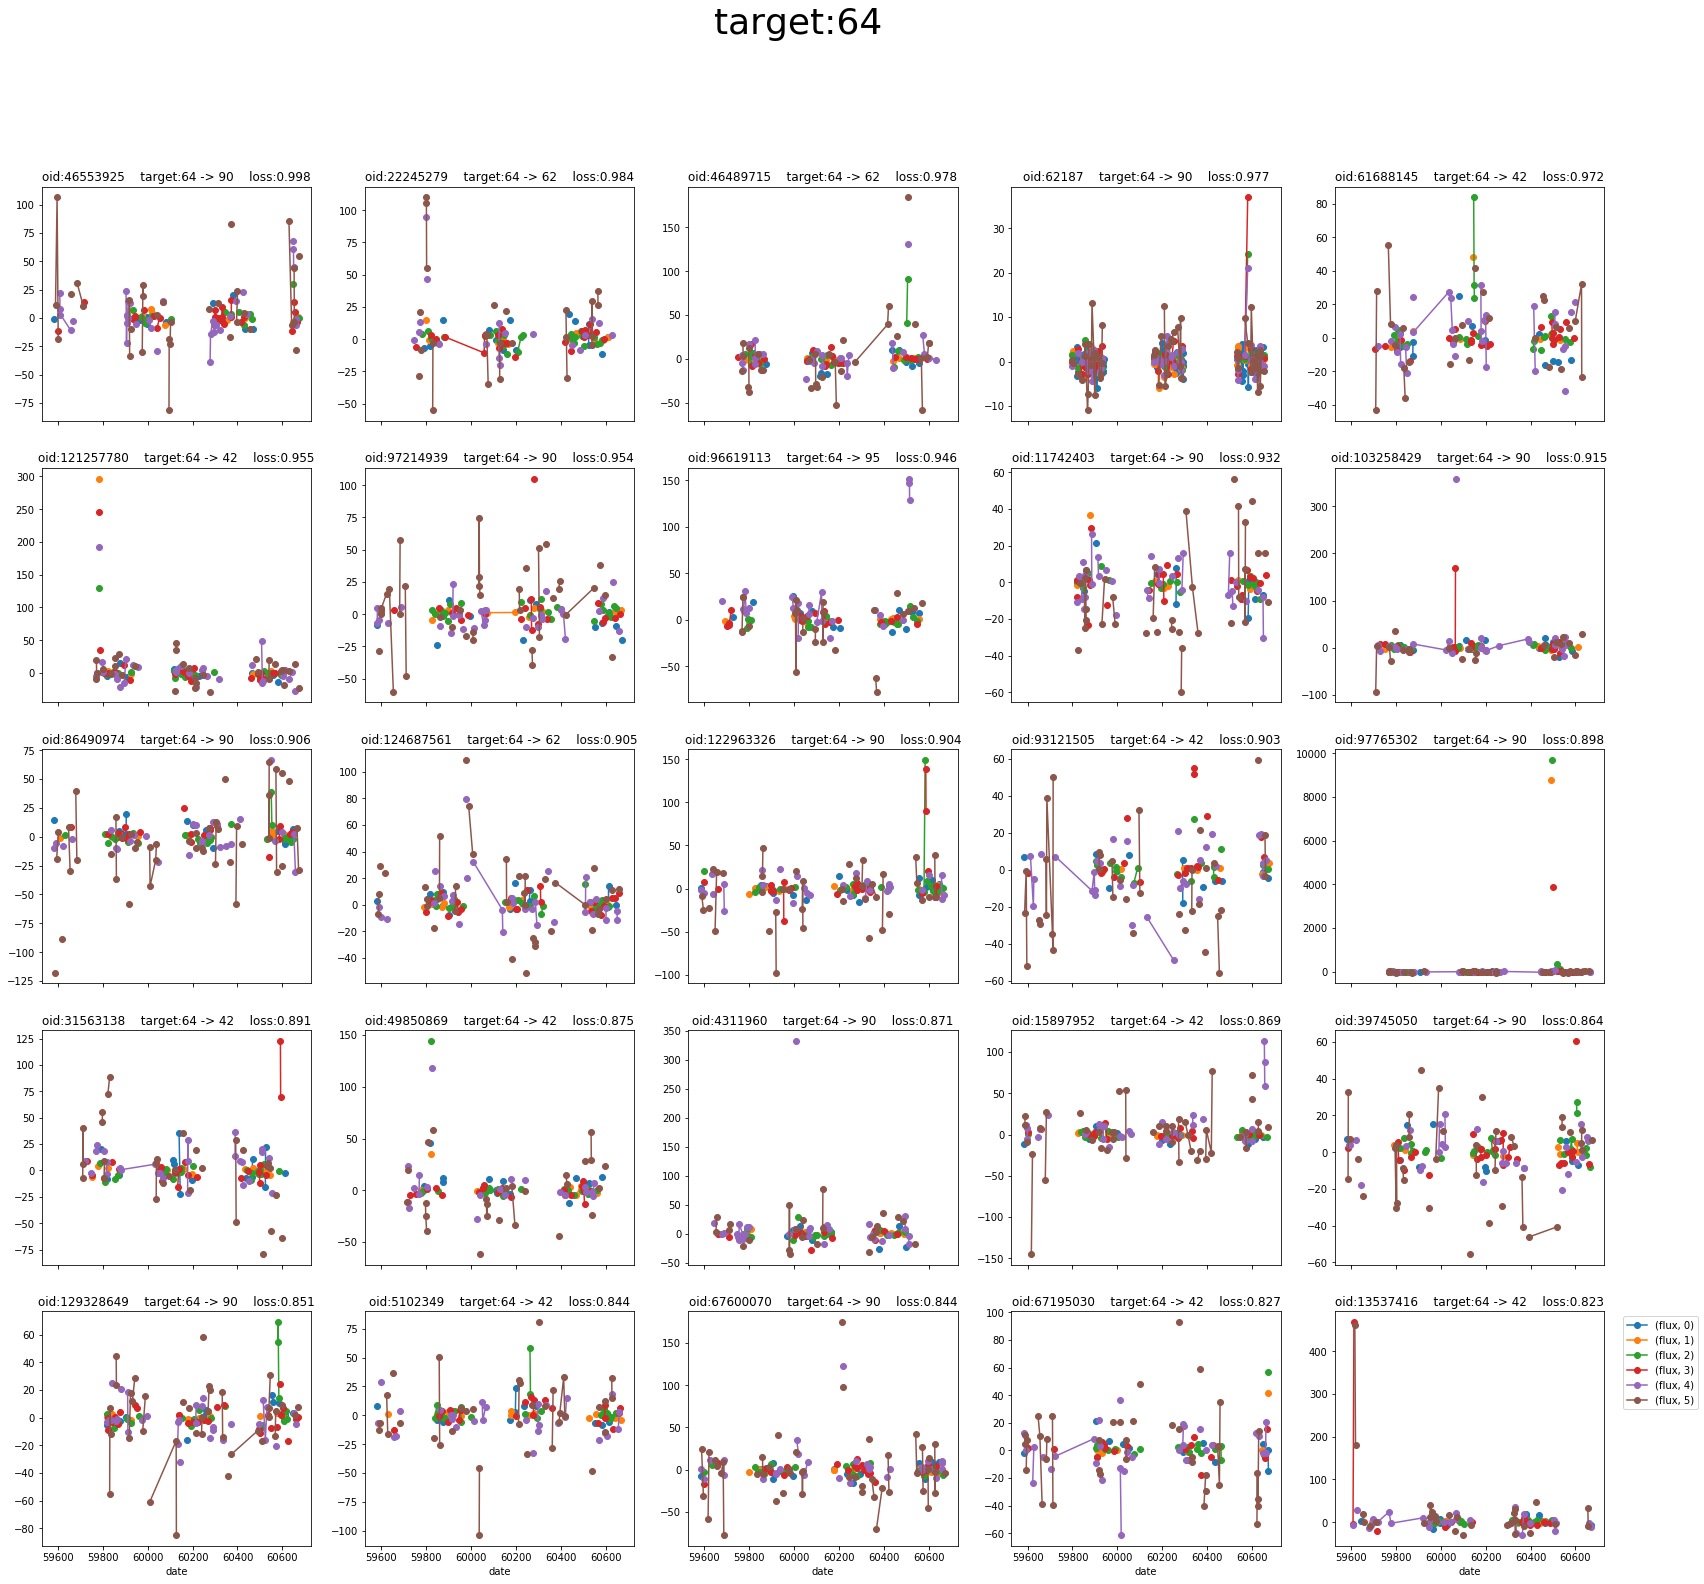

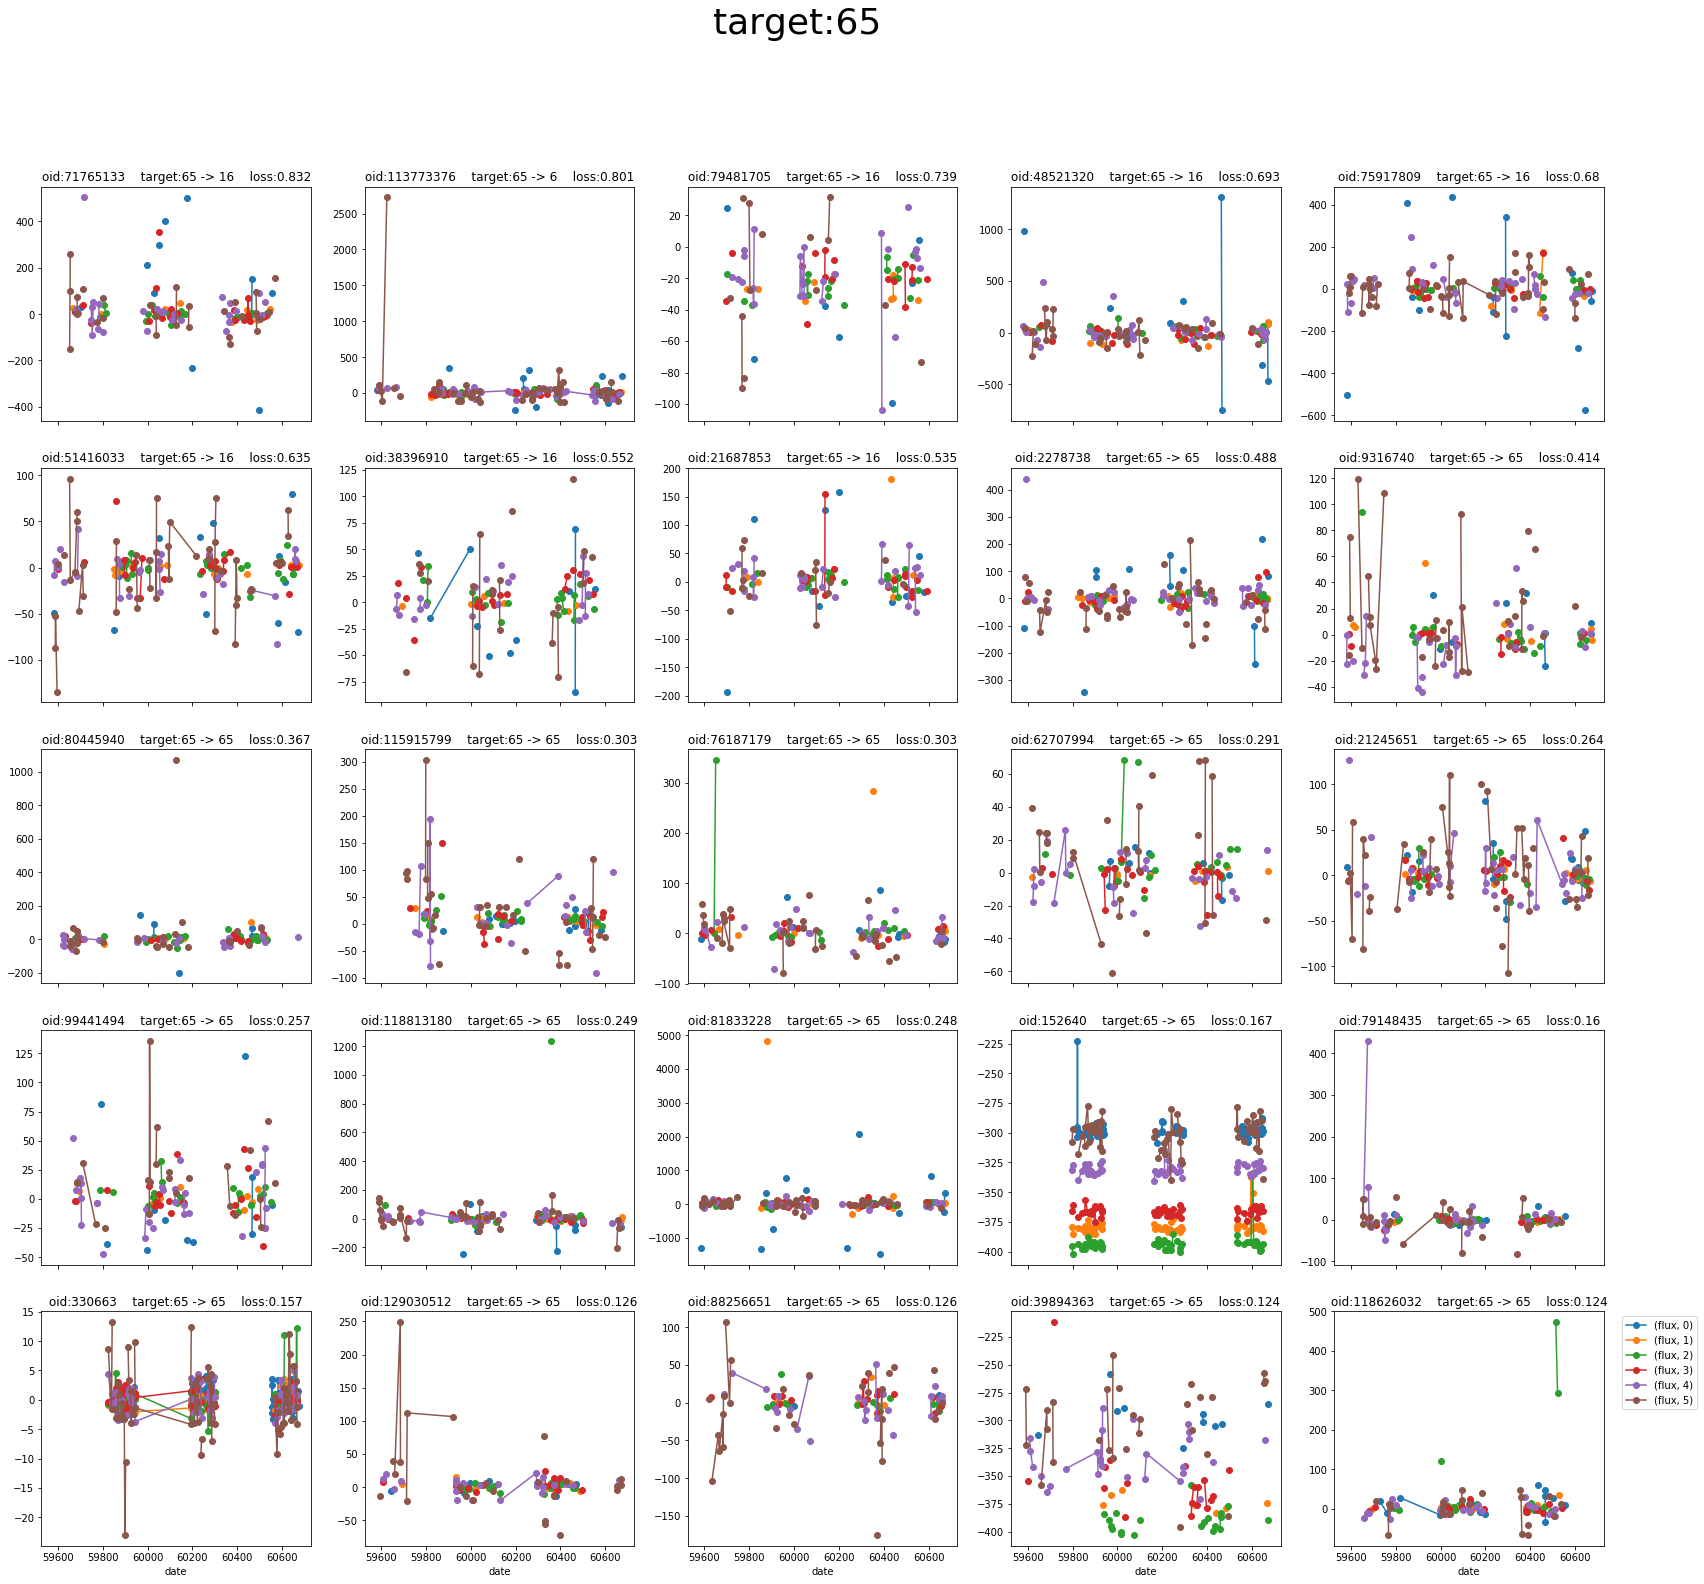

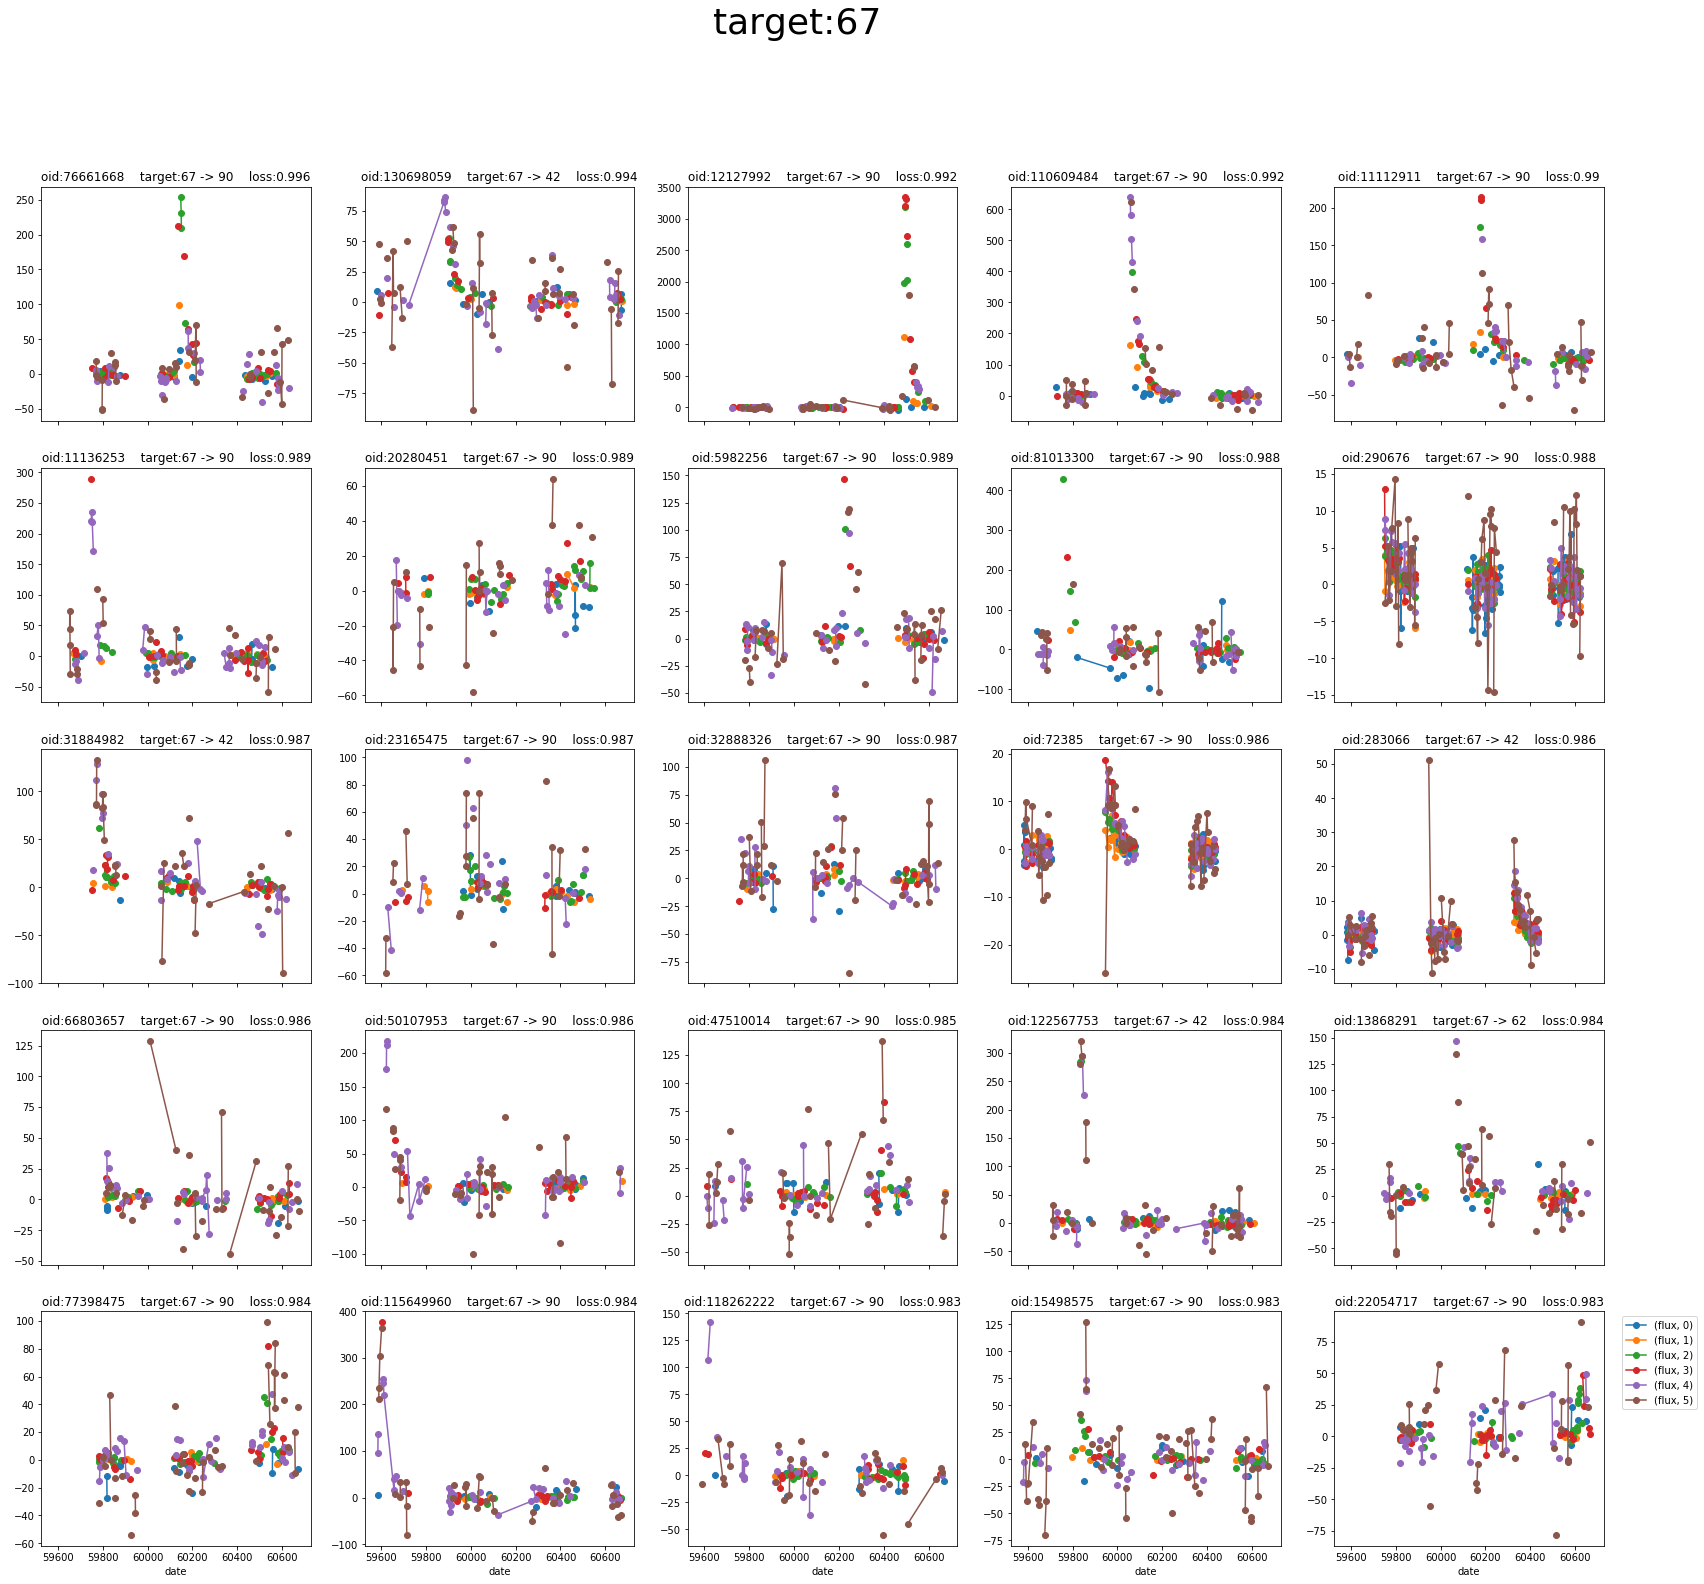

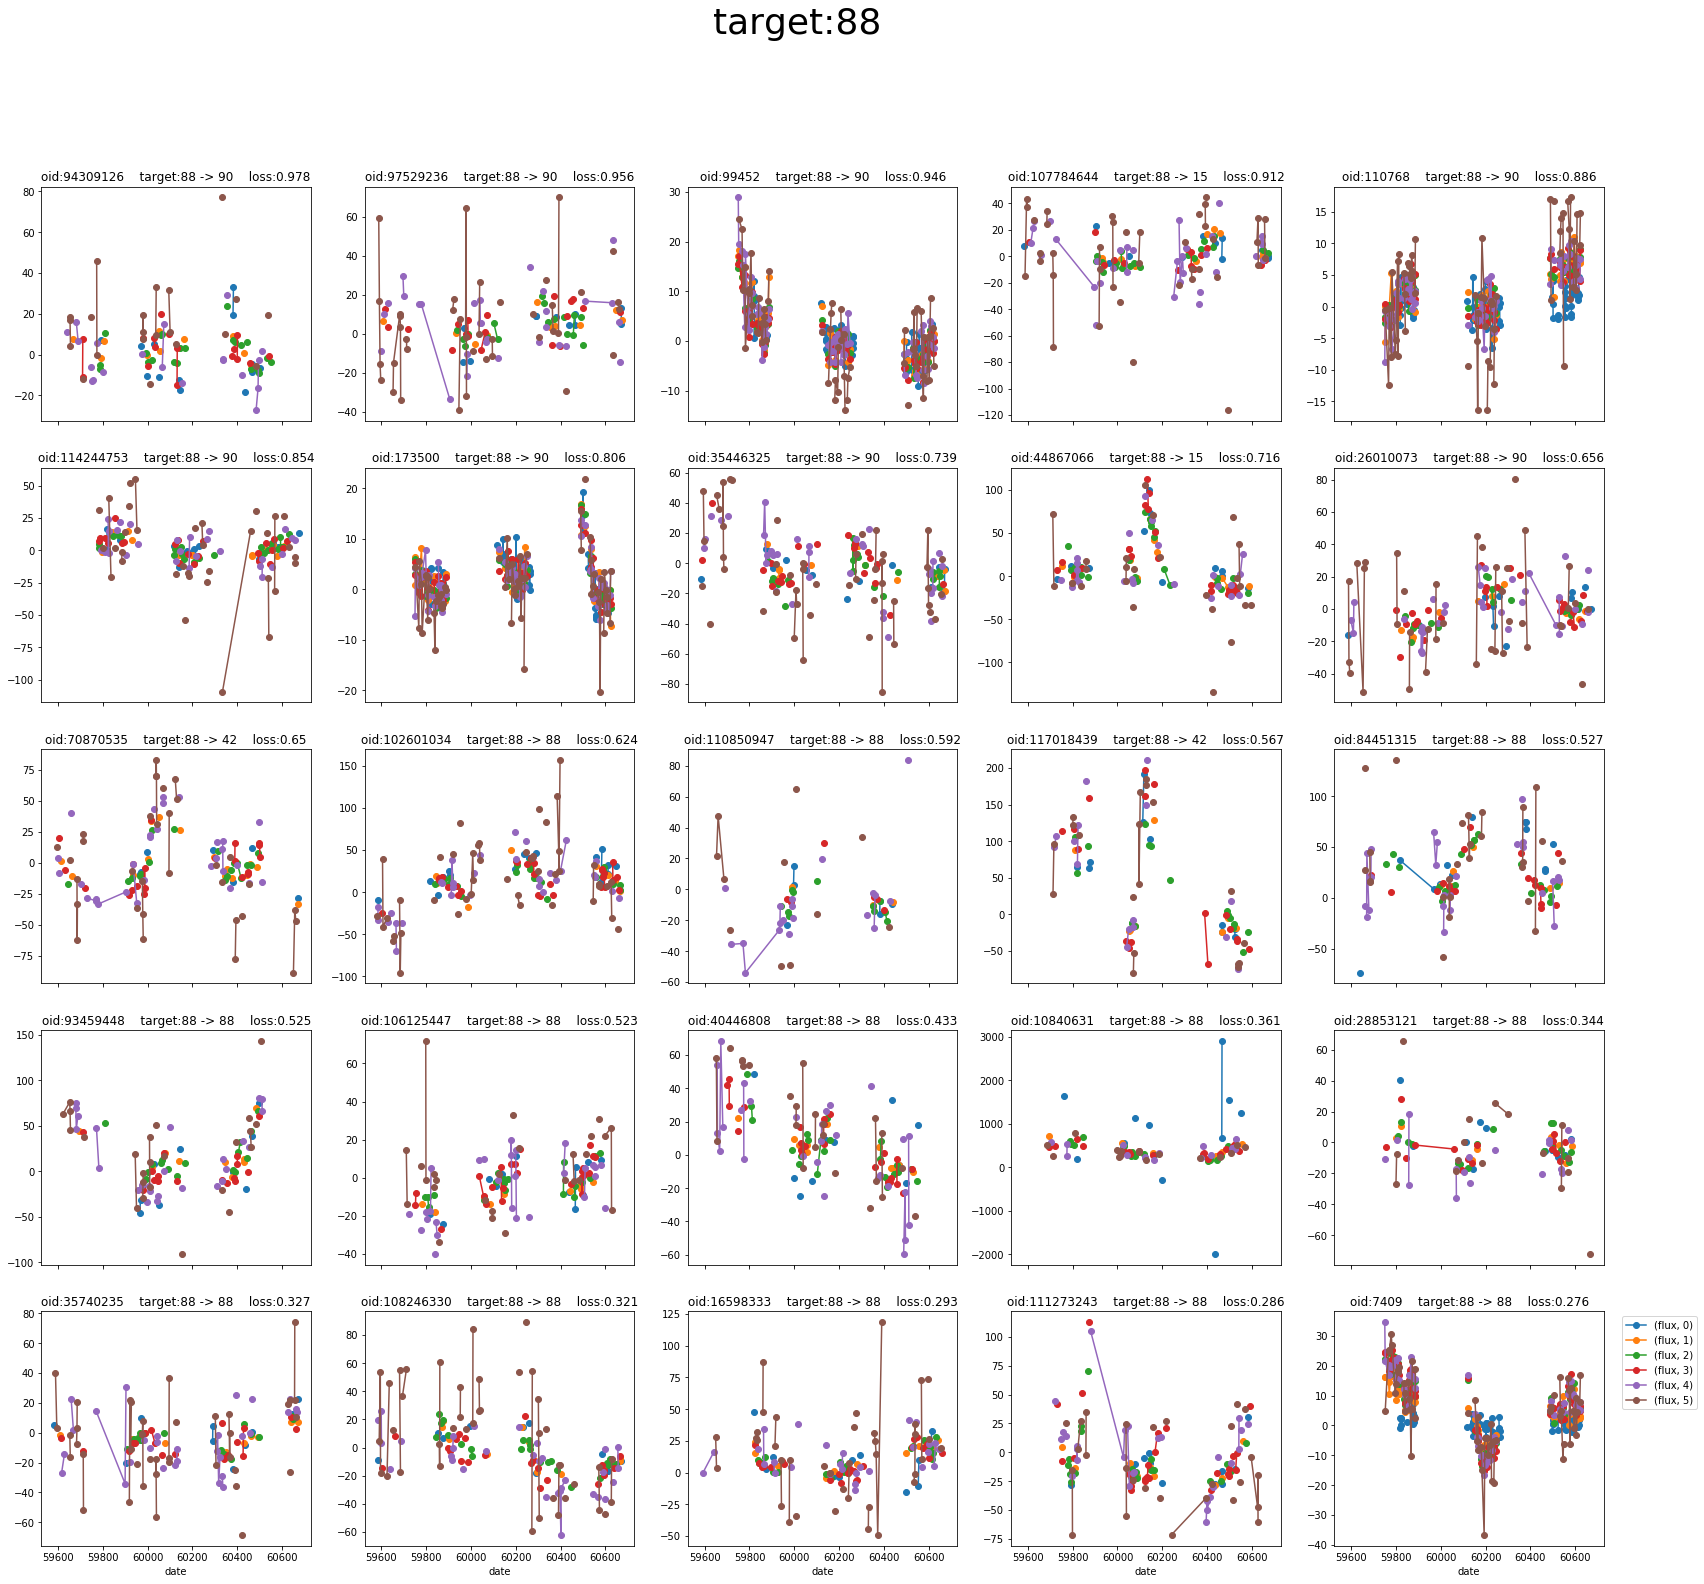

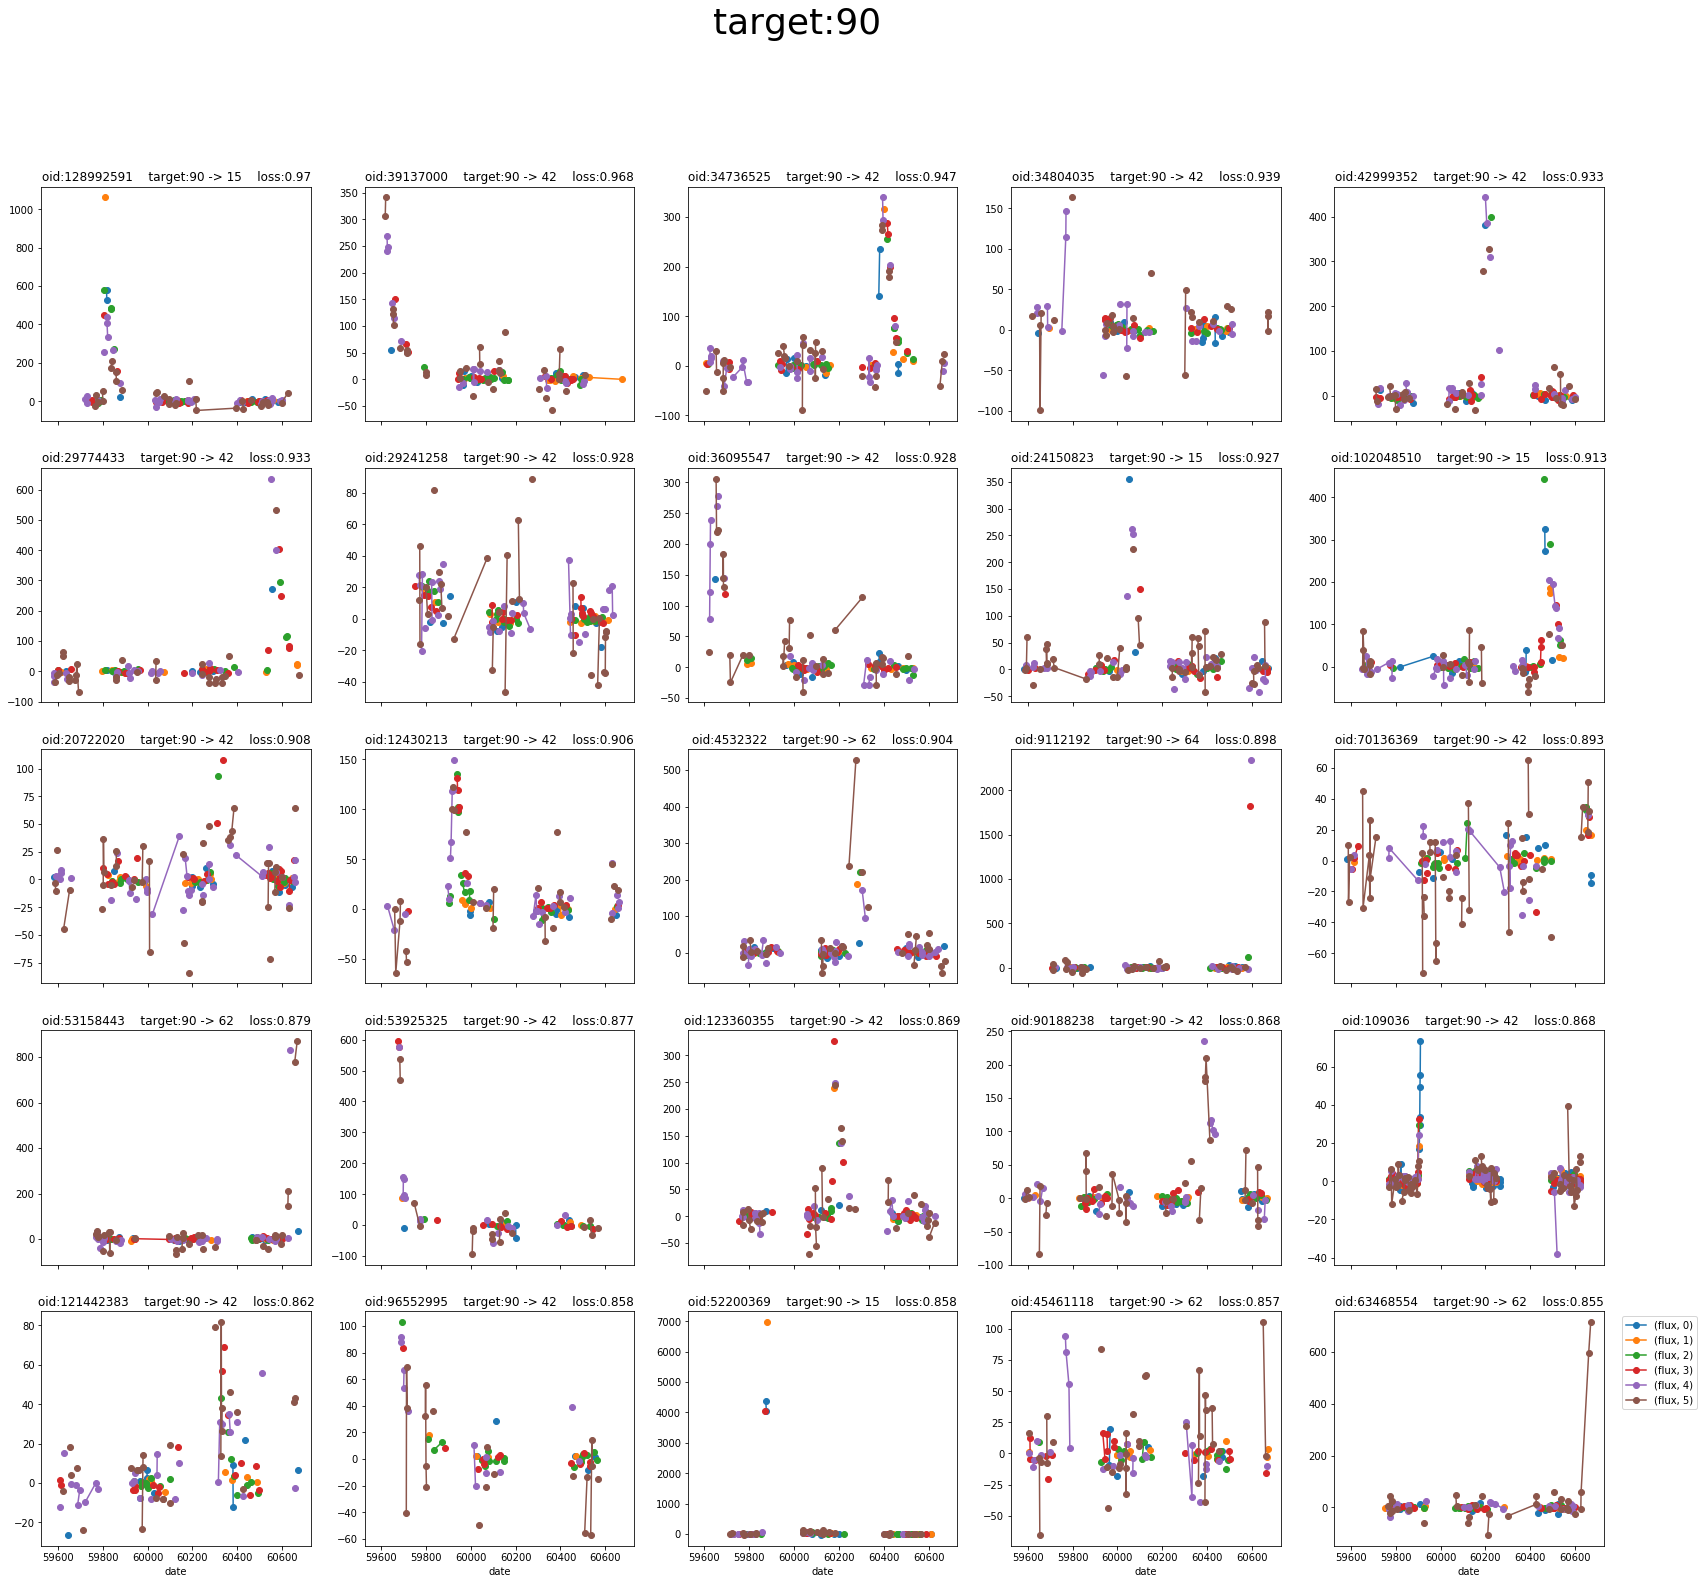

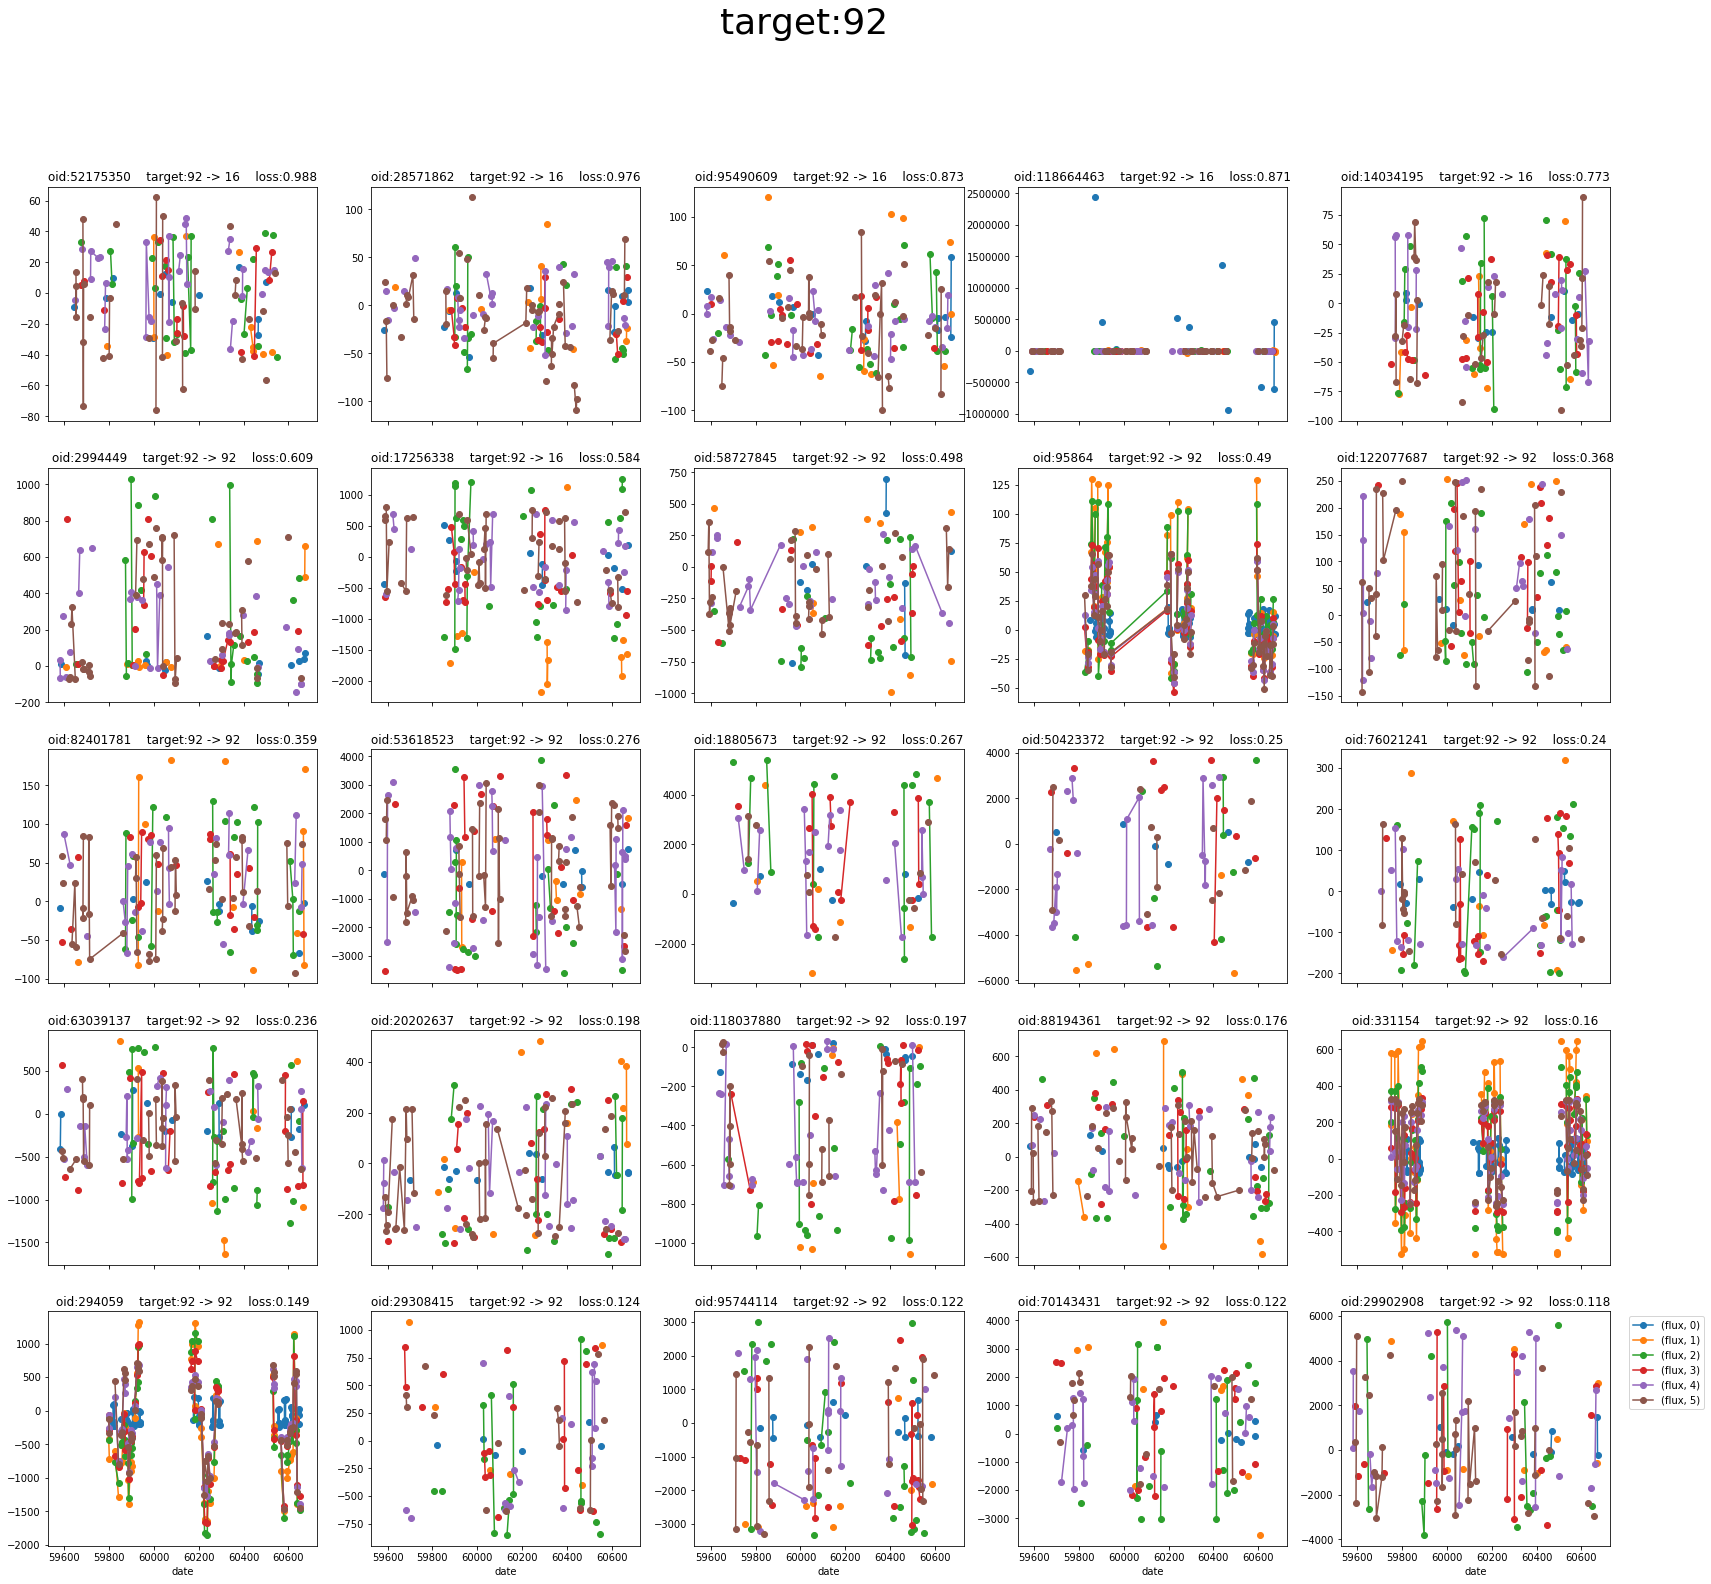

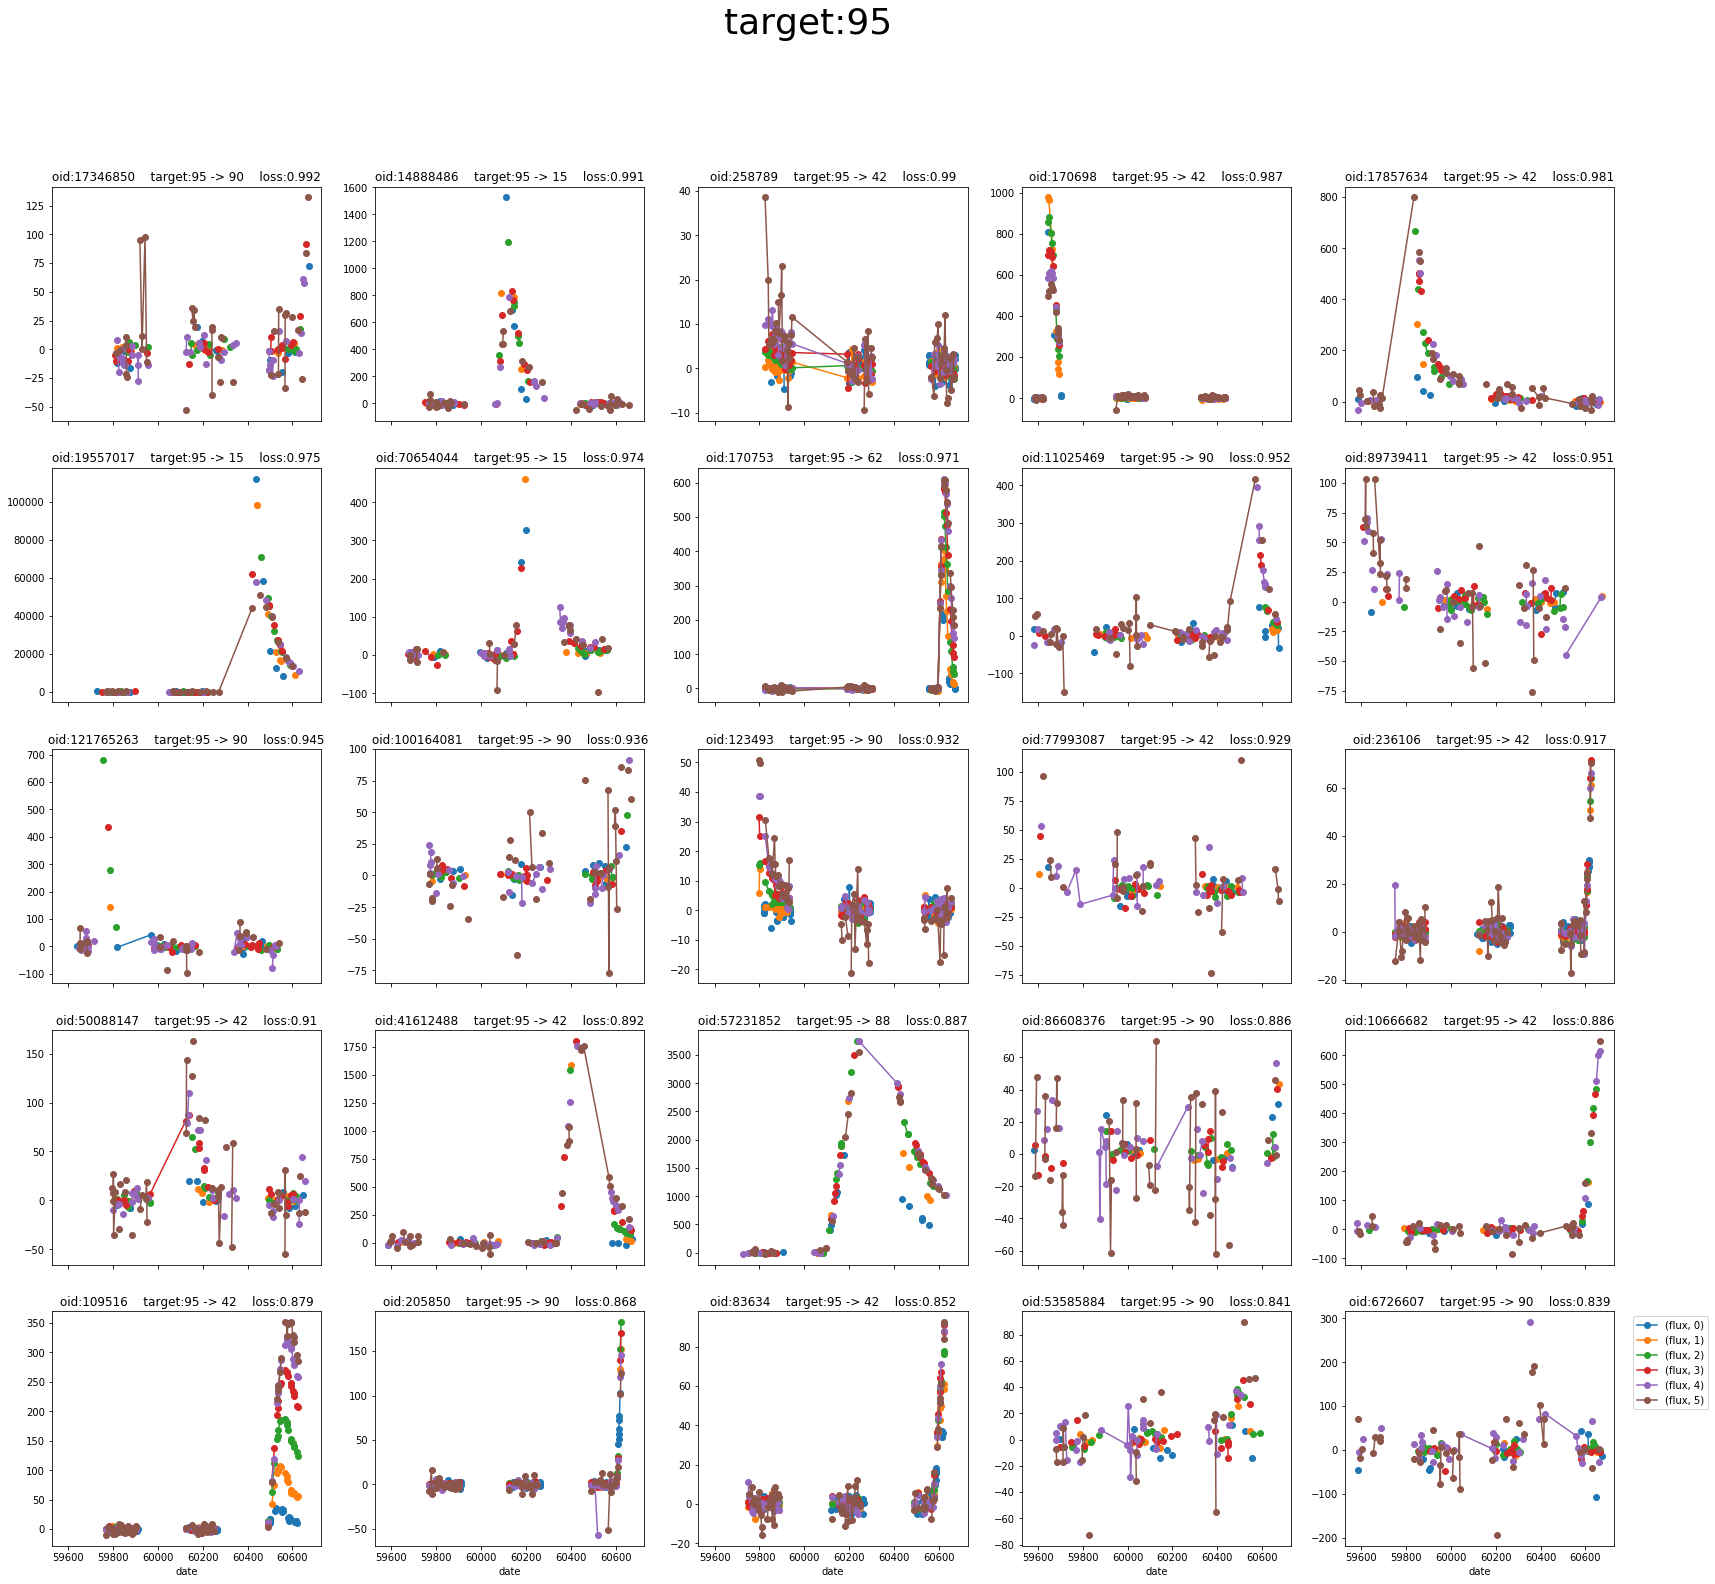

In [51]:
classes = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
M, N = 5, 5
for c in tqdm(classes):
    li = tr[tr.target==c].head(M*N).object_id.tolist()
    fig, axes = plt.subplots(ncols=M, nrows=N, figsize=(28, 25), sharex=True)
    
    # プロット
    for i,(ax, oid) in enumerate(zip(axes.ravel(), li)):
        df=plt_obj(oid, return_df=True)

        target = tr.loc[tr.object_id==oid, 'tmp'].values[0]
        loss = tr.loc[tr.object_id==oid, 'loss'].values[0]
        loss = round(loss, 3)

        if i==24:
            legend=True
        else:
            legend = False
        df.plot(ax=ax,  marker="o", legend=legend, title=f'oid:{oid}    target:{target}    loss:{loss}')
    
    fig.suptitle(f'target:{c}', fontsize=36)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')